# RN-III Pilot plots

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_theme(style="darkgrid")

from dotenv import load_dotenv
import os
import glob
import json

### Specify paths + Load data files

In [2]:
pilot_name = "rn-iii-pilot-2"
to_save_plots = True
data_path = f"./data/for_plots/{pilot_name}"

figures_path = f"./analysis/figures/{pilot_name}"
if not os.path.exists(figures_path):
    os.makedirs(figures_path)

scores_df = pd.read_csv(os.path.join(data_path,"scores.csv"),index_col=0)
trials_time = pd.read_csv(os.path.join(data_path,"trials_time.csv"))
sessions_time = pd.read_csv(os.path.join(data_path,"sessions_time.csv"))
post_survey_df = pd.read_csv(os.path.join(data_path,"post_survey_df.csv"))

## Numbers for Alex and Levin

### P_SOCIAL_LEARNING
The chance of a participant to learn the optimal strategy by observing a single optimal demonstration.
(number of participant in pilot b that reach level 4 in demonstration trials) / (number of participants in pilot b * number of demonstration trails per participant)

In [3]:
b = scores_df[ (scores_df['expName']=='rn-iii-pilot-2B') & (scores_df['trialType']=='demonstration') & (scores_df['isAI']==False) ]
print("P_SOCIAL_LEARNING: ", len(b[b['maxLevelReached']==4])/len(b))

P_SOCIAL_LEARNING:  0.15


### P_INDIVIDUAL_LEARNING
The chance of the chance of a participant to learn the optimal strategy by individual learning in a single round
(number of participant in pilot a that reach level 4 in individual trials) / (number of participants in pilot a * number of individual learning trails per participant)

In [4]:
a = scores_df[ (scores_df['expName']=='rn-iii-pilot-2A') & (scores_df['trialType']=='individual') & (scores_df['isAI']==False) ]
print("P_INDIVIDUAL_LEARNING: ", len(a[a['maxLevelReached']==4])/len(a))

P_INDIVIDUAL_LEARNING:  0.17777777777777778


In [8]:
a.groupby(by=['sessionId'])['trialType'].size()

sessionId
63e60e5c86a07638e1044c25    18
63e60e5c86a07638e1044c26    18
63e60e5c86a07638e1044c27    18
63e60e5c86a07638e1044c28    18
63e60e5c86a07638e1044c29    18
63e60e5c86a07638e1044c2a    18
63e60e5c86a07638e1044c2b    18
63e60e5c86a07638e1044c2c    18
63e60e5c86a07638e1044c2d    18
63e60e5c86a07638e1044c2e    18
Name: trialType, dtype: int64

double check the number of individual trials

In [3]:
from models.session import Session
from models.network import Network
from models.trial import Trial

data = []
trial_table_columns = ['sessionId', 'generation', 'trialType', 'trialIdx', 'parentSessionId',
                            'parentSession_isAI']
session_isAI_dict = {}
wdir = os.getcwd()
ddir = os.path.join(wdir, 'data')
data_path = glob.glob(os.path.join(ddir, 'raw', 'rn-iii-pilot-2A') + f'/sessions_rn-iii-pilot-2A_*.json')[0]

# Opening JSON file (sessions)
with open(data_path) as json_file:
    sessions = json.load(json_file)

# validate data using pydantic Session model and create list of sessions
sessions_list = [Session(**s) for s in sessions]
for s in sessions_list:
    session_isAI_dict[s.id] = s.ai_player


for s in sessions_list:
    for t in s.trials:
        #print(s.id, t.trial_type)
        # if t.trial_type not in ['social_learning']:
        if t.trial_type not in ['observation', 'repeat', 'try_yourself']:
            data.append((s.id, s.generation, t.trial_type, t.id, None, None))
        else:
            data.append((s.id,
                         s.generation,
                         t.trial_type,  # t.trial_type + '_' + t.social_learning_type,
                         t.id,
                         t.advisor.advisor_id,
                         session_isAI_dict[t.advisor.advisor_id]))

# make dataframe and save it as csv
trial = pd.DataFrame(data, columns=trial_table_columns)
print('PILOT A')
trial.groupby(by=['sessionId'])['trialType'].value_counts()

PILOT A


sessionId                 trialType       
63e60e5c86a07638e1044c25  individual          18
                          instruction          4
                          demonstration        2
                          consent              1
                          debriefing           1
                                              ..
63e60e5c86a07638e1044c2e  consent              1
                          debriefing           1
                          post_survey          1
                          practice             1
                          written_strategy     1
Name: trialType, Length: 80, dtype: int64

In [4]:
data = []
trial_table_columns = ['sessionId', 'generation', 'trialType', 'trialIdx', 'parentSessionId',
                            'parentSession_isAI']
session_isAI_dict = {}
wdir = os.getcwd()
ddir = os.path.join(wdir, 'data')
data_path = glob.glob(os.path.join(ddir, 'raw', 'rn-iii-pilot-2B') + f'/sessions_rn-iii-pilot-2B_*.json')[0]

# Opening JSON file (sessions)
with open(data_path) as json_file:
    sessions = json.load(json_file)

# validate data using pydantic Session model and create list of sessions
sessions_list = [Session(**s) for s in sessions]
for s in sessions_list:
    session_isAI_dict[s.id] = s.ai_player


for s in sessions_list:
    for t in s.trials:
        #print(s.id, t.trial_type)
        # if t.trial_type not in ['social_learning']:
        if t.trial_type not in ['observation', 'repeat', 'try_yourself']:
            data.append((s.id, s.generation, t.trial_type, t.id, None, None))
        else:
            data.append((s.id,
                         s.generation,
                         t.trial_type,  # t.trial_type + '_' + t.social_learning_type,
                         t.id,
                         t.advisor.advisor_id,
                         session_isAI_dict[t.advisor.advisor_id]))

# make dataframe and save it as csv
trial = pd.DataFrame(data, columns=trial_table_columns)
print('PILOT B')
trial.groupby(by=['sessionId'])['trialType'].value_counts()

PILOT B


sessionId                 trialType       
63e623d186a07638e1044c3e  individual          6
                          demonstration       2
                          written_strategy    1
63e623d186a07638e1044c3f  individual          6
                          demonstration       2
                                             ..
63e623d186a07638e1044c51  consent             1
                          debriefing          1
                          post_survey         1
                          practice            1
                          written_strategy    1
Name: trialType, Length: 150, dtype: int64

### SOLUTION_SIG, SOLUTION_MEAN, SOLUTION_RANDOM_MEAN, SOLUTION_MYOPIC_MEAN and SOLUTION_OPTIMAL_MEAN
Take all human trials from both pilots

In [9]:
scores_df

sessionId   isAI          expName  generation  trialIdx  \
0    63e623d186a07638e1044c3e   True  rn-iii-pilot-2B           0       NaN   
1    63e623d186a07638e1044c3e   True  rn-iii-pilot-2B           0       0.0   
2    63e623d186a07638e1044c3e   True  rn-iii-pilot-2B           0       1.0   
3    63e623d186a07638e1044c3e   True  rn-iii-pilot-2B           0       2.0   
4    63e623d186a07638e1044c3e   True  rn-iii-pilot-2B           0       3.0   
..                        ...    ...              ...         ...       ...   
415  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      19.0   
416  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      20.0   
417  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      21.0   
418  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      23.0   
419  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      24.0   

         trialType                         networkId   score  maxLevelReached  \
0     try_yourself                               NaN     NaN              NaN   
1       individual  91cdbb8e2f9597586478fa053981cb26  1250.0              4.0   
2       individual  ff0f703dfe1d882c5ad406968b364400  1250.0              4.0   
3       individual  4f8eae6cdbd172ad96143170a2cd5210  1450.0              4.0   
4       individual  4f475517800453162f0b33b385659d21  1650.0              4.0   
..             ...                               ...     ...              ...   
415     individual  affba38a460e4d4ee78dde13b97dc4ad  1450.0              4.0   
416     individual  b6d8c0b0b07899c978620adbf26f0bf6   600.0              2.0   
417     individual  dd33e76ce36532d66d6ae40164cc2235  1300.0              0.0   
418  demonstration  4e749f7b49d3c2e88b8f5c5c4684d2d9   550.0              2.0   
419  demonstration  483a024a066d50791fbbfd3a417babc0   450.0              1.0   

     myopic_score  ai_score  
0             NaN       NaN  
1          1250.0    1250.0  
2          1250.0    1250.0  
3          1450.0    1450.0  
4          1650.0    1650.0  
..            ...       ...  
415        1450.0    1450.0  
416        1250.0    1250.0  
417        1250.0    1250.0  
418        1050.0    1050.0  
419        1250.0    1250.0  

[420 rows x 11 columns]

In [20]:
c = scores_df[ (scores_df['score'].notnull()) & (scores_df['isAI']==False) & (scores_df['trialType'].isin(['individual','demonstration']))]
print("SOLUTION_SIG: ",c.var()['score'])

SOLUTION_SIG:  238345.62211981564


/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_2635/628225127.py:2: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("SOLUTION_SIG: ",c.var()['score'])


In [21]:
# bring in myopic and random solutions
random = pd.read_csv('/Users/bonati/Desktop/CHM/reward_networks/solve_networks/df_solutions_random.csv')
random = random[random['step']==8][['network_id','total_reward']]
random.rename(columns={"total_reward": "random_score"}, inplace=True)
myopic = pd.read_csv('/Users/bonati/Desktop/CHM/reward_networks/solve_networks/df_solutions_myopic.csv')
myopic = myopic[myopic['step']==8][['network_id','total_reward']]
myopic.rename(columns={"total_reward": "myopic_score2"}, inplace=True)

c1 = pd.merge(c,random,left_on='networkId',right_on='network_id',how='inner')
c2 = pd.merge(c1,myopic,left_on='networkId',right_on='network_id',how='inner')
c2

sessionId   isAI          expName  generation  trialIdx  \
0    63e623d186a07638e1044c48  False  rn-iii-pilot-2B           1      20.0   
1    63e623d186a07638e1044c48  False  rn-iii-pilot-2B           1      21.0   
2    63e623d186a07638e1044c48  False  rn-iii-pilot-2B           1      22.0   
3    63e60e5c86a07638e1044c25  False  rn-iii-pilot-2A           0      10.0   
4    63e623d186a07638e1044c48  False  rn-iii-pilot-2B           1      23.0   
..                        ...    ...              ...         ...       ...   
275  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      18.0   
276  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      20.0   
277  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      21.0   
278  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      23.0   
279  63e60e5c86a07638e1044c2e  False  rn-iii-pilot-2A           0      24.0   

         trialType                         networkId   score  maxLevelReached  \
0       individual  975ea289a849aed45e6c4ac4a9cad8e9  1600.0              0.0   
1       individual  c2d4da6eb07a01eb7dd89ae44c1b7250   550.0              1.0   
2       individual  b06e63e23be6e795171cc39de5f68b04   200.0              2.0   
3       individual  b06e63e23be6e795171cc39de5f68b04   850.0              1.0   
4       individual  41d2982cb44e3f920a0cde591983309c  1200.0              0.0   
..             ...                               ...     ...              ...   
275     individual  bfc3abd5ff21130fcf457362c329b046  1450.0              4.0   
276     individual  b6d8c0b0b07899c978620adbf26f0bf6   600.0              2.0   
277     individual  dd33e76ce36532d66d6ae40164cc2235  1300.0              0.0   
278  demonstration  4e749f7b49d3c2e88b8f5c5c4684d2d9   550.0              2.0   
279  demonstration  483a024a066d50791fbbfd3a417babc0   450.0              1.0   

     myopic_score  ai_score                      network_id_x  random_score  \
0          1450.0    1450.0  975ea289a849aed45e6c4ac4a9cad8e9           700   
1          1650.0    1650.0  c2d4da6eb07a01eb7dd89ae44c1b7250           150   
2          1050.0    1050.0  b06e63e23be6e795171cc39de5f68b04           300   
3          1050.0    1050.0  b06e63e23be6e795171cc39de5f68b04           300   
4          1050.0    1050.0  41d2982cb44e3f920a0cde591983309c            50   
..            ...       ...                               ...           ...   
275        1450.0    1450.0  bfc3abd5ff21130fcf457362c329b046             0   
276        1250.0    1250.0  b6d8c0b0b07899c978620adbf26f0bf6           500   
277        1250.0    1250.0  dd33e76ce36532d66d6ae40164cc2235          -150   
278        1050.0    1050.0  4e749f7b49d3c2e88b8f5c5c4684d2d9           350   
279        1250.0    1250.0  483a024a066d50791fbbfd3a417babc0           500   

                         network_id_y  myopic_score2  
0    975ea289a849aed45e6c4ac4a9cad8e9           1600  
1    c2d4da6eb07a01eb7dd89ae44c1b7250            600  
2    b06e63e23be6e795171cc39de5f68b04           1200  
3    b06e63e23be6e795171cc39de5f68b04           1200  
4    41d2982cb44e3f920a0cde591983309c           1200  
..                                ...            ...  
275  bfc3abd5ff21130fcf457362c329b046            600  
276  b6d8c0b0b07899c978620adbf26f0bf6            400  
277  dd33e76ce36532d66d6ae40164cc2235           1300  
278  4e749f7b49d3c2e88b8f5c5c4684d2d9            300  
279  483a024a066d50791fbbfd3a417babc0            200  

[280 rows x 15 columns]

In [23]:
print('SOLUTION_MEAN: ', c2['score'].mean())
print('SOLUTION_RANDOM_MEAN: ', c2['random_score'].mean())
print('SOLUTION_MYOPIC_MEAN: ', c2['myopic_score2'].mean())
print('SOLUTION_OPTIMAL_MEAN: ', c2['ai_score'].mean())

SOLUTION_MEAN:  713.5714285714286
SOLUTION_RANDOM_MEAN:  498.39285714285717
SOLUTION_MYOPIC_MEAN:  755.1785714285714
SOLUTION_OPTIMAL_MEAN:  1224.642857142857


## Time plots
### time distribution per experiment

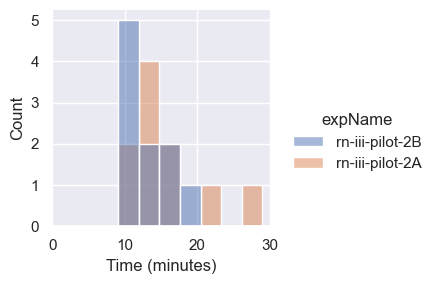

In [70]:
fig1 = sns.displot(sessions_time,
                   x="duration",
                   hue="expName",
                   kind='hist',
                   stat='count',
                   height=3)
# add label to the axis and label to the plot
fig1.set(xlabel="Time (minutes)", xlim=(0, 30), ylabel="Count")
if to_save_plots:
    fig1.savefig(os.path.join(figures_path, f'Time_dist_sessions.pdf'), format='pdf', dpi=300)
    fig1.savefig(os.path.join(figures_path, f'Time_dist_sessions.png'), format='png', dpi=300)

### time distribution per experiment and per trial type

In [23]:
trials_time.groupby(by=["expName","trialType"]).size()

expName          trialType       
rn-iii-pilot-2A  demonstration        20
                 individual          180
                 written_strategy     10
rn-iii-pilot-2B  demonstration        20
                 individual           60
                 try_yourself         40
                 written_strategy     10
dtype: int64

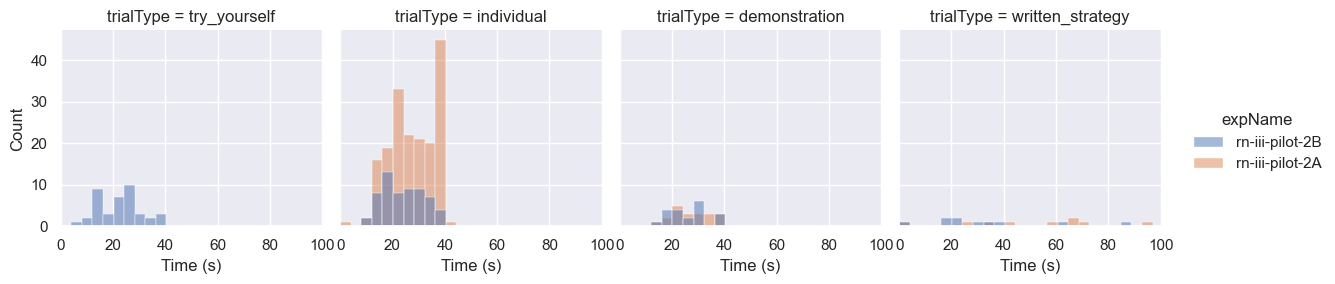

In [24]:
fig2 = sns.displot(trials_time,
                   x="duration",
                   hue="expName",
                   col="trialType",
                   kind='hist',
                   stat='count',
                   height=3)
# add label to the axis and label to the plot
fig2.set(xlabel="Time (s)", xlim=(0, 100), ylabel="Count")
if to_save_plots:
    fig2.savefig(os.path.join(figures_path, f'Time_dist_trial_type.pdf'), format='pdf', dpi=300)
    fig2.savefig(os.path.join(figures_path, f'Time_dist_trial_type.png'), format='png', dpi=300)

## Post survey plots

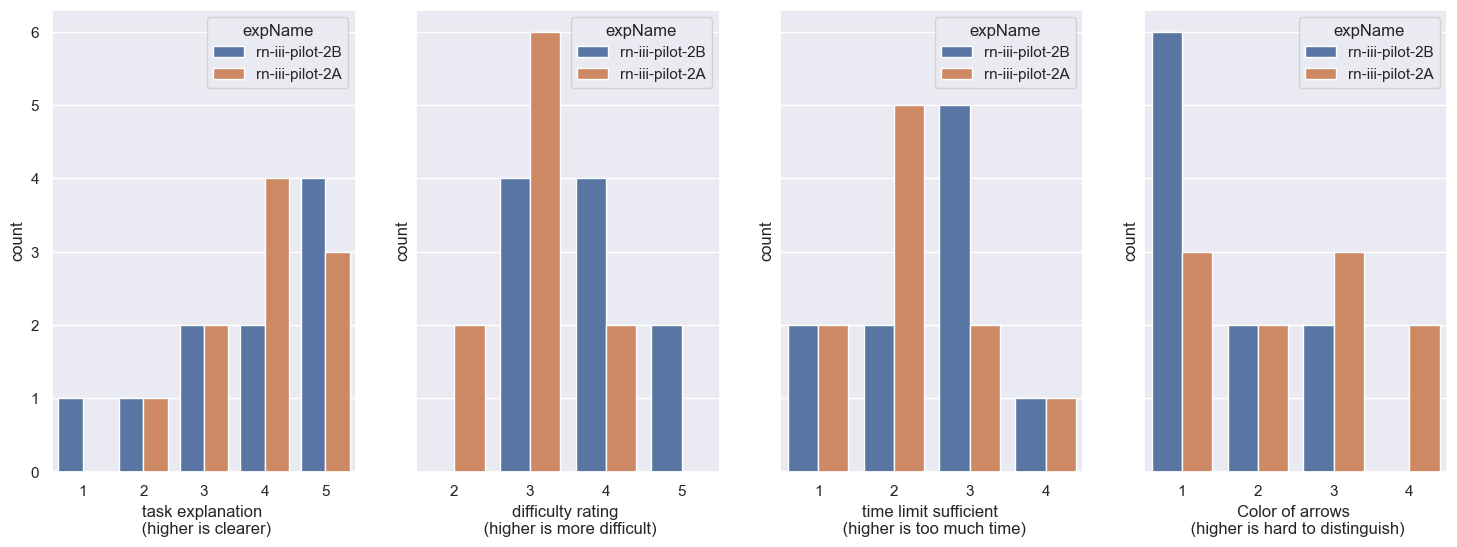

In [71]:
variables = ['task_explanation', 'difficulty_rating', 'time_limit_sufficient', 'arrows_color']
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, len(variables), sharey=True, figsize=(18, 6))

sns.countplot(data=post_survey_df, x="task_explanation", hue="expName", ax=ax1)
ax1.set_xlabel('task explanation \n (higher is clearer)')
sns.countplot(data=post_survey_df, x="difficulty_rating", hue="expName", ax=ax2)
ax2.set_xlabel('difficulty rating \n (higher is more difficult)')
sns.countplot(data=post_survey_df, x="time_limit_sufficient", hue="expName", ax=ax3)
ax3.set_xlabel('time limit sufficient \n (higher is too much time)')
sns.countplot(data=post_survey_df, x="arrows_color", hue="expName", ax=ax4)
ax4.set_xlabel('Color of arrows \n (higher is hard to distinguish)')

if to_save_plots:
    f.savefig(os.path.join(figures_path, 'post_survey.pdf'), format='pdf', dpi=300)
    f.savefig(os.path.join(figures_path, 'post_survey.png'), format='png', dpi=300)

## Scores plots
### preprocessing

In [6]:
scores_df.replace({"isAI": {True: 'AI', False: 'Human'}}, inplace=True)
plot_hue = scores_df['expName'].astype(str) + ', ' + scores_df['isAI'].astype(str)
scores_df['plot_hue'] = scores_df['expName'].astype(str) + ', ' + scores_df['isAI'].astype(str)

scores_df.groupby(by=["expName","trialType","isAI"]).size()

expName          trialType      isAI 
rn-iii-pilot-2A  demonstration  Human     20
                 individual     Human    180
                 try_yourself   Human     10
rn-iii-pilot-2B  demonstration  AI        20
                                Human     20
                 individual     AI        60
                                Human     60
                 try_yourself   AI        10
                                Human     40
dtype: int64

In [7]:
scores_df

sessionId   isAI          expName  generation  trialIdx  \
0    63e623d186a07638e1044c3e     AI  rn-iii-pilot-2B           0       NaN   
1    63e623d186a07638e1044c3e     AI  rn-iii-pilot-2B           0       0.0   
2    63e623d186a07638e1044c3e     AI  rn-iii-pilot-2B           0       1.0   
3    63e623d186a07638e1044c3e     AI  rn-iii-pilot-2B           0       2.0   
4    63e623d186a07638e1044c3e     AI  rn-iii-pilot-2B           0       3.0   
..                        ...    ...              ...         ...       ...   
415  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A           0      19.0   
416  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A           0      20.0   
417  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A           0      21.0   
418  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A           0      23.0   
419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A           0      24.0   

         trialType                         networkId   score  maxLevelReached  \
0     try_yourself                               NaN     NaN              NaN   
1       individual  91cdbb8e2f9597586478fa053981cb26  1250.0              4.0   
2       individual  ff0f703dfe1d882c5ad406968b364400  1250.0              4.0   
3       individual  4f8eae6cdbd172ad96143170a2cd5210  1450.0              4.0   
4       individual  4f475517800453162f0b33b385659d21  1650.0              4.0   
..             ...                               ...     ...              ...   
415     individual  affba38a460e4d4ee78dde13b97dc4ad  1450.0              4.0   
416     individual  b6d8c0b0b07899c978620adbf26f0bf6   600.0              2.0   
417     individual  dd33e76ce36532d66d6ae40164cc2235  1300.0              0.0   
418  demonstration  4e749f7b49d3c2e88b8f5c5c4684d2d9   550.0              2.0   
419  demonstration  483a024a066d50791fbbfd3a417babc0   450.0              1.0   

     myopic_score  ai_score                plot_hue  
0             NaN       NaN     rn-iii-pilot-2B, AI  
1          1250.0    1250.0     rn-iii-pilot-2B, AI  
2          1250.0    1250.0     rn-iii-pilot-2B, AI  
3          1450.0    1450.0     rn-iii-pilot-2B, AI  
4          1650.0    1650.0     rn-iii-pilot-2B, AI  
..            ...       ...                     ...  
415        1450.0    1450.0  rn-iii-pilot-2A, Human  
416        1250.0    1250.0  rn-iii-pilot-2A, Human  
417        1250.0    1250.0  rn-iii-pilot-2A, Human  
418        1050.0    1050.0  rn-iii-pilot-2A, Human  
419        1250.0    1250.0  rn-iii-pilot-2A, Human  

[420 rows x 12 columns]

### correlations

In [ ]:
print(
    f'Correlation between performance and max level reached in a trial (1A): {scores_df[scores_df["expName"] == "rn-iii-pilot-1A"]["score"].corr(scores_df[scores_df["expName"] == "rn-iii-pilot-1A"]["maxLevelReached"])}')
print(
    f'Correlation between performance and max level reached in a trial (1B - AI): {scores_df[(scores_df["expName"] == "rn-iii-pilot-1B") & (scores_df["isAI"] == True)]["score"].corr(scores_df[(scores_df["expName"] == "rn-iii-pilot-1B") & (scores_df["isAI"] == True)]["maxLevelReached"])}')
print(
    f'Correlation between performance and max level reached in a trial (1B - Human): {scores_df[(scores_df["expName"] == "rn-iii-pilot-1B") & (scores_df["isAI"] == False)]["score"].corr(scores_df[(scores_df["expName"] == "rn-iii-pilot-1B") & (scores_df["isAI"] == False)]["maxLevelReached"])}')


### boxplot comparing the solving strategies performance

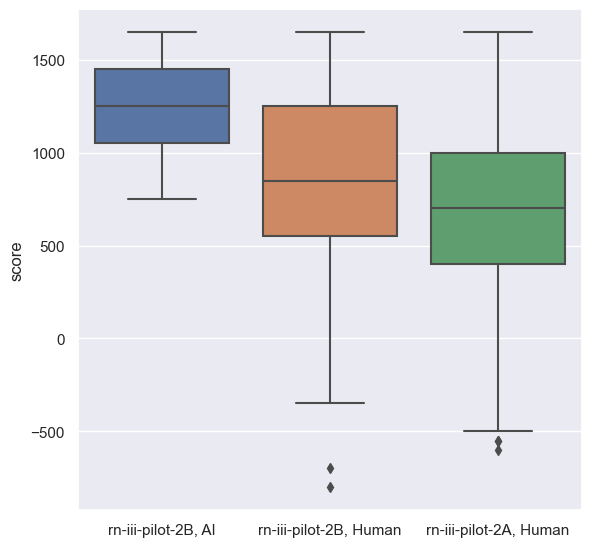

In [73]:
box, ax = plt.subplots(figsize=(6.5, 6.5))
sns.boxplot(scores_df, x=plot_hue, y="score", ax=ax)

if to_save_plots:
    box.savefig(os.path.join(figures_path, 'Reward_boxplot.pdf'), format='pdf', dpi=300)
    box.savefig(os.path.join(figures_path, 'Reward_boxplot.png'), format='png', dpi=300)

### distribution of trial reward scores per experiment and per trial type

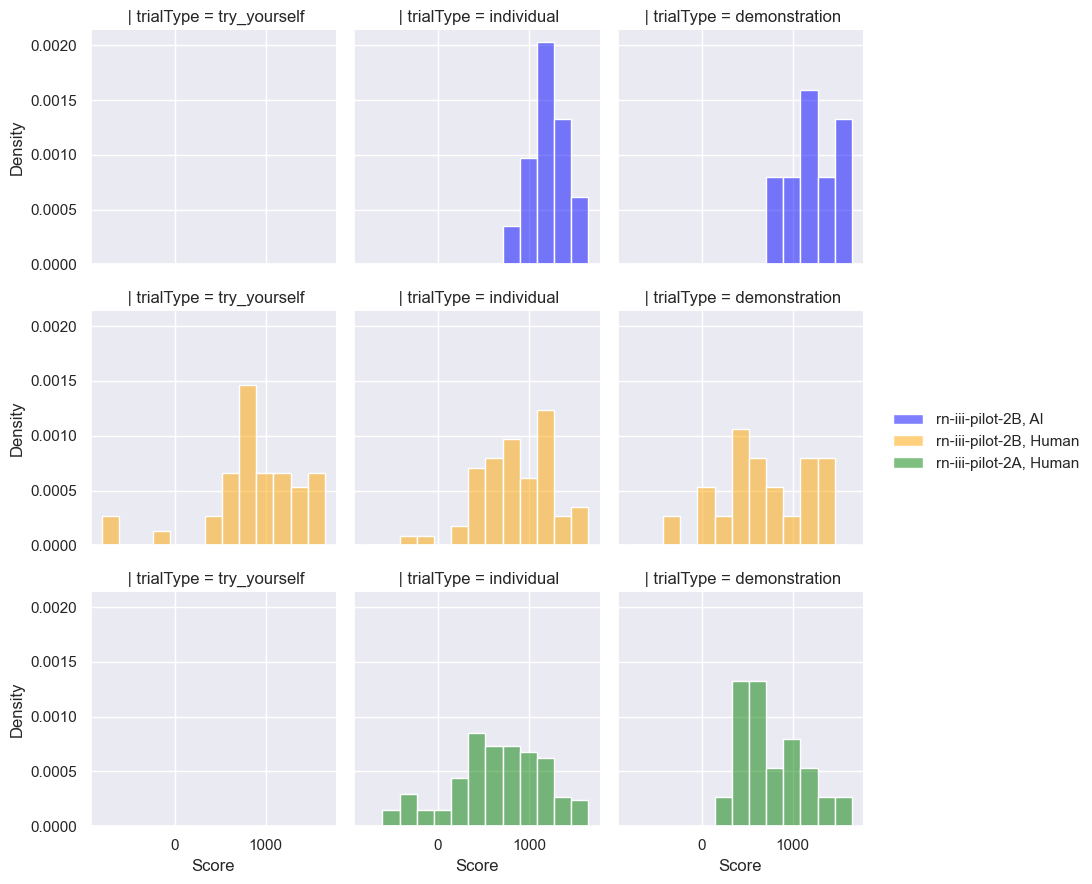

In [76]:
fig3 = sns.displot(scores_df,
                   x="score",
                   hue=plot_hue,
                   row=plot_hue,
                   col="trialType",
                   kind='hist',
                   stat='density',
                   common_norm=False,
                   palette={'rn-iii-pilot-2B, AI': 'blue','rn-iii-pilot-2B, Human': 'orange',
                            'rn-iii-pilot-2A, Human': 'green'},
                   height=3)
# add label to the axis and label to the plot
fig3.set(xlabel="Score", ylabel="Density")
fig3.set_titles(row_template="")

if to_save_plots:
    fig3.savefig(os.path.join(figures_path, 'Reward_dist_trial_type.pdf'), format='pdf', dpi=300)
    fig3.savefig(os.path.join(figures_path, 'Reward_dist_trial_type.png'), format='png', dpi=300)

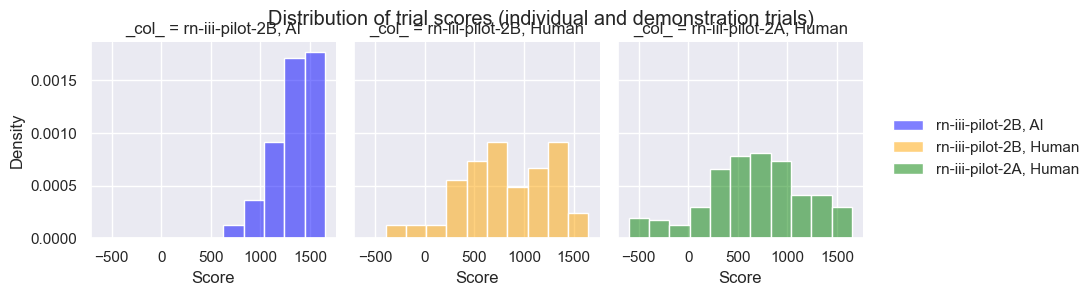

In [89]:
fig4 = sns.displot(scores_df[scores_df['trialType'].isin(['individual','demonstration'])],
                   x="score",
                   hue=plot_hue,
                   col=plot_hue,
                   kind='hist',
                   stat='density',
                   common_norm=False,
                   palette={'rn-iii-pilot-2B, AI': 'blue','rn-iii-pilot-2B, Human': 'orange',
                            'rn-iii-pilot-2A, Human': 'green'},
                   height=3)
# add label to the axis and label to the plot
fig4.set(xlabel="Score", ylabel="Density")
fig4.set_titles(row_template="")
fig4.fig.suptitle("Distribution of trial scores (individual and demonstration trials)")

if to_save_plots:
    fig4.savefig(os.path.join(figures_path, 'Reward_dist_ind_dem_trials.pdf'), format='pdf', dpi=300)
    fig4.savefig(os.path.join(figures_path, 'Reward_dist_ind_dem_trials.png'), format='png', dpi=300)

### boxplot of scores for each trial type and experiment type

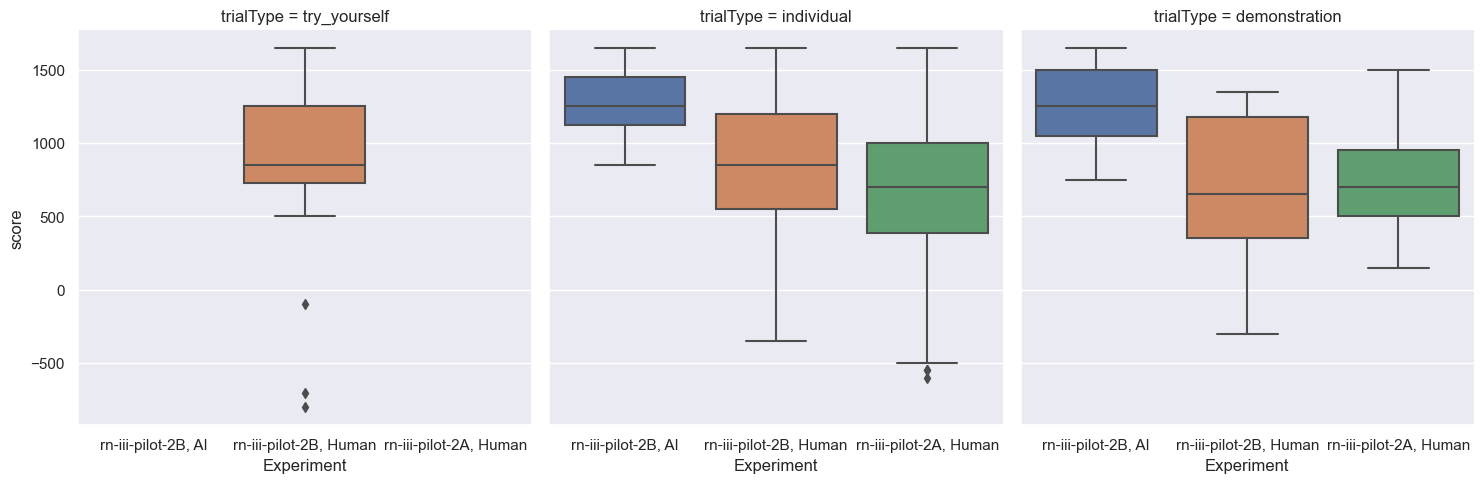

In [77]:
# boxplot with aggregated performance for quick comparison (over trial type)
box2 = sns.catplot(data=scores_df, x="plot_hue", y="score", col="trialType", kind="box")
# add label to the axis and label to the plot
box2.set(xlabel="Experiment", ylabel="score")

if to_save_plots:
    box2.savefig(os.path.join(figures_path, 'Reward_boxplot_trial_type.pdf'), format='pdf', dpi=300)
    box2.savefig(os.path.join(figures_path, 'Reward_boxplot_trial_type.png'), format='png', dpi=300)

In [31]:
scores_df.groupby(by=['expName',"sessionId",'trialType'])['score'].mean().to_frame('avg_score_participant').reset_index()

expName                 sessionId      trialType  \
0   rn-iii-pilot-2A  63e60e5c86a07638e1044c25  demonstration   
1   rn-iii-pilot-2A  63e60e5c86a07638e1044c25     individual   
2   rn-iii-pilot-2A  63e60e5c86a07638e1044c25   try_yourself   
3   rn-iii-pilot-2A  63e60e5c86a07638e1044c26  demonstration   
4   rn-iii-pilot-2A  63e60e5c86a07638e1044c26     individual   
..              ...                       ...            ...   
85  rn-iii-pilot-2B  63e623d186a07638e1044c50     individual   
86  rn-iii-pilot-2B  63e623d186a07638e1044c50   try_yourself   
87  rn-iii-pilot-2B  63e623d186a07638e1044c51  demonstration   
88  rn-iii-pilot-2B  63e623d186a07638e1044c51     individual   
89  rn-iii-pilot-2B  63e623d186a07638e1044c51   try_yourself   

    avg_score_participant  
0              725.000000  
1              725.000000  
2                     NaN  
3              575.000000  
4              855.555556  
..                    ...  
85             591.666667  
86             850.000000  
87             875.000000  
88            1233.333333  
89             812.500000  

[90 rows x 4 columns]

## NEW: for pilot 2B get the grand average across all steps
First we create a dataframe similar to the one below, for individual and demonstration

In [19]:
scores_dfA = scores_df[scores_df['expName']=='rn-iii-pilot-2A']
scores_dfB = scores_df[scores_df['expName']=='rn-iii-pilot-2B']
moves_dfA = pd.read_csv('/Users/bonati/Desktop/CHM/reward_networks/reward-network-iii-analysis/data/final/rn-iii-pilot-2A/moves.csv',index_col=0)
moves_dfB = pd.read_csv('/Users/bonati/Desktop/CHM/reward_networks/reward-network-iii-analysis/data/final/rn-iii-pilot-2B/moves.csv',index_col=0)
moves_dfA

sessionId  trialID                         networkId  \
0     63e60e5c86a07638e1044c25        4  e3f5160138fcdd6c579c93ea907ec44b   
1     63e60e5c86a07638e1044c25        4  e3f5160138fcdd6c579c93ea907ec44b   
2     63e60e5c86a07638e1044c25        4  e3f5160138fcdd6c579c93ea907ec44b   
3     63e60e5c86a07638e1044c25        4  e3f5160138fcdd6c579c93ea907ec44b   
4     63e60e5c86a07638e1044c25        4  e3f5160138fcdd6c579c93ea907ec44b   
...                        ...      ...                               ...   
1470  63e60e5c86a07638e1044c2e       24  483a024a066d50791fbbfd3a417babc0   
1471  63e60e5c86a07638e1044c2e       24  483a024a066d50791fbbfd3a417babc0   
1472  63e60e5c86a07638e1044c2e       24  483a024a066d50791fbbfd3a417babc0   
1473  63e60e5c86a07638e1044c2e       24  483a024a066d50791fbbfd3a417babc0   
1474  63e60e5c86a07638e1044c2e       24  483a024a066d50791fbbfd3a417babc0   

      sourceLevel  targetLevel  reward  step  matchesMyopic  matchesAI  
0               0            0       0     1           True       True  
1               0            0     200     2          False      False  
2               0            0       0     3          False      False  
3               0            0       0     4          False      False  
4               0            0       0     5          False      False  
...           ...          ...     ...   ...            ...        ...  
1470            0            1     -50     4          False      False  
1471            1            0     200     5          False      False  
1472            0            0       0     6          False      False  
1473            0            1     -50     7          False      False  
1474            1            0     200     8          False      False  

[1475 rows x 9 columns]

### performance over trial index

In [79]:
provaA= pd.merge(scores_dfA,moves_dfA, left_on=['sessionId','trialIdx'],right_on=['sessionId','trialID'], how='inner')
provaB= pd.merge(scores_dfB,moves_dfB, left_on=['sessionId','trialIdx'],right_on=['sessionId','trialID'], how='inner')
provaA

Unnamed: 0                 sessionId   isAI          expName  \
0            211  63e60e5c86a07638e1044c25  Human  rn-iii-pilot-2A   
1            211  63e60e5c86a07638e1044c25  Human  rn-iii-pilot-2A   
2            211  63e60e5c86a07638e1044c25  Human  rn-iii-pilot-2A   
3            211  63e60e5c86a07638e1044c25  Human  rn-iii-pilot-2A   
4            211  63e60e5c86a07638e1044c25  Human  rn-iii-pilot-2A   
...          ...                       ...    ...              ...   
1470         419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A   
1471         419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A   
1472         419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A   
1473         419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A   
1474         419  63e60e5c86a07638e1044c2e  Human  rn-iii-pilot-2A   

      generation  trialIdx      trialType                       networkId_x  \
0              0       4.0     individual  e3f5160138fcdd6c579c93ea907ec44b   
1              0       4.0     individual  e3f5160138fcdd6c579c93ea907ec44b   
2              0       4.0     individual  e3f5160138fcdd6c579c93ea907ec44b   
3              0       4.0     individual  e3f5160138fcdd6c579c93ea907ec44b   
4              0       4.0     individual  e3f5160138fcdd6c579c93ea907ec44b   
...          ...       ...            ...                               ...   
1470           0      24.0  demonstration  483a024a066d50791fbbfd3a417babc0   
1471           0      24.0  demonstration  483a024a066d50791fbbfd3a417babc0   
1472           0      24.0  demonstration  483a024a066d50791fbbfd3a417babc0   
1473           0      24.0  demonstration  483a024a066d50791fbbfd3a417babc0   
1474           0      24.0  demonstration  483a024a066d50791fbbfd3a417babc0   

      score  maxLevelReached  ...  ai_score                plot_hue trialID  \
0     500.0              2.0  ...    1050.0  rn-iii-pilot-2A, Human       4   
1     500.0              2.0  ...    1050.0  rn-iii-pilot-2A, Human       4   
2     500.0              2.0  ...    1050.0  rn-iii-pilot-2A, Human       4   
3     500.0              2.0  ...    1050.0  rn-iii-pilot-2A, Human       4   
4     500.0              2.0  ...    1050.0  rn-iii-pilot-2A, Human       4   
...     ...              ...  ...       ...                     ...     ...   
1470  450.0              1.0  ...    1250.0  rn-iii-pilot-2A, Human      24   
1471  450.0              1.0  ...    1250.0  rn-iii-pilot-2A, Human      24   
1472  450.0              1.0  ...    1250.0  rn-iii-pilot-2A, Human      24   
1473  450.0              1.0  ...    1250.0  rn-iii-pilot-2A, Human      24   
1474  450.0              1.0  ...    1250.0  rn-iii-pilot-2A, Human      24   

                           networkId_y sourceLevel  targetLevel  reward  step  \
0     e3f5160138fcdd6c579c93ea907ec44b           0            0       0     1   
1     e3f5160138fcdd6c579c93ea907ec44b           0            0     200     2   
2     e3f5160138fcdd6c579c93ea907ec44b           0            0       0     3   
3     e3f5160138fcdd6c579c93ea907ec44b           0            0       0     4   
4     e3f5160138fcdd6c579c93ea907ec44b           0            0       0     5   
...                                ...         ...          ...     ...   ...   
1470  483a024a066d50791fbbfd3a417babc0           0            1     -50     4   
1471  483a024a066d50791fbbfd3a417babc0           1            0     200     5   
1472  483a024a066d50791fbbfd3a417babc0           0            0       0     6   
1473  483a024a066d50791fbbfd3a417babc0           0            1     -50     7   
1474  483a024a066d50791fbbfd3a417babc0           1            0     200     8   

      matchesMyopic  matchesAI  
0              True       True  
1             False      False  
2             False      False  
3             False      False  
4             False      False  
...             ...        ...  
1470          False      False  
1471          False      False

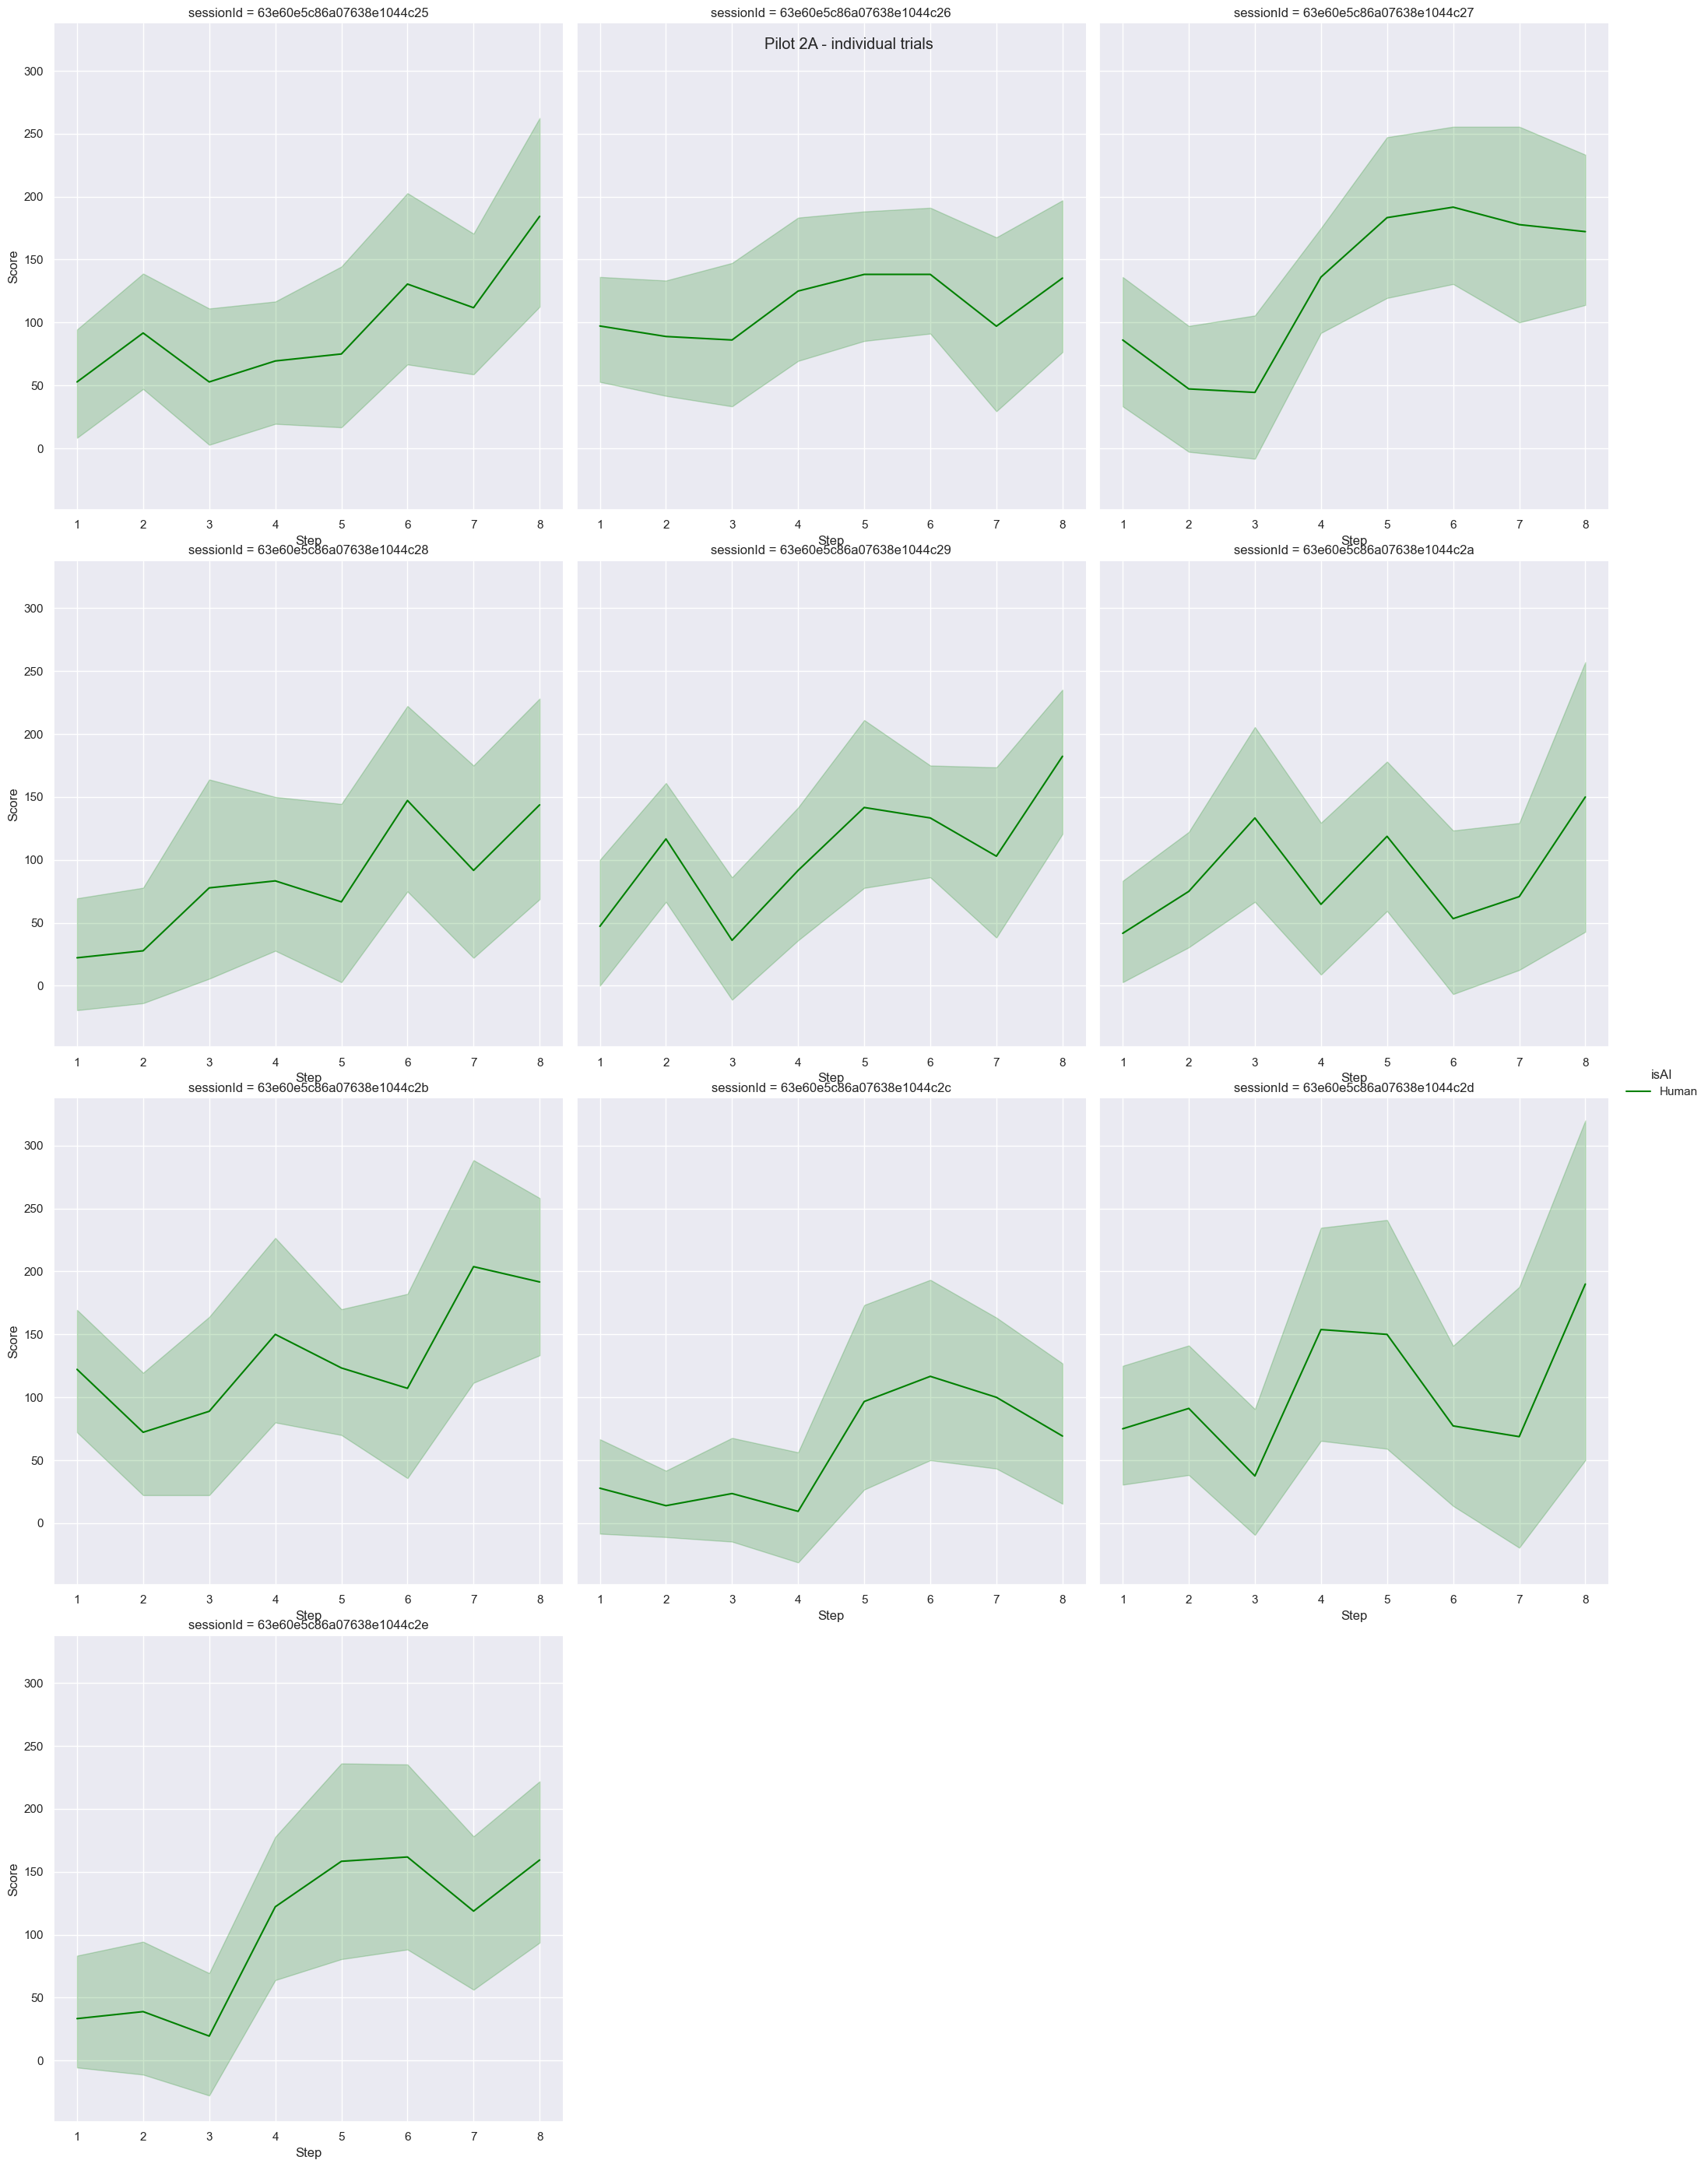

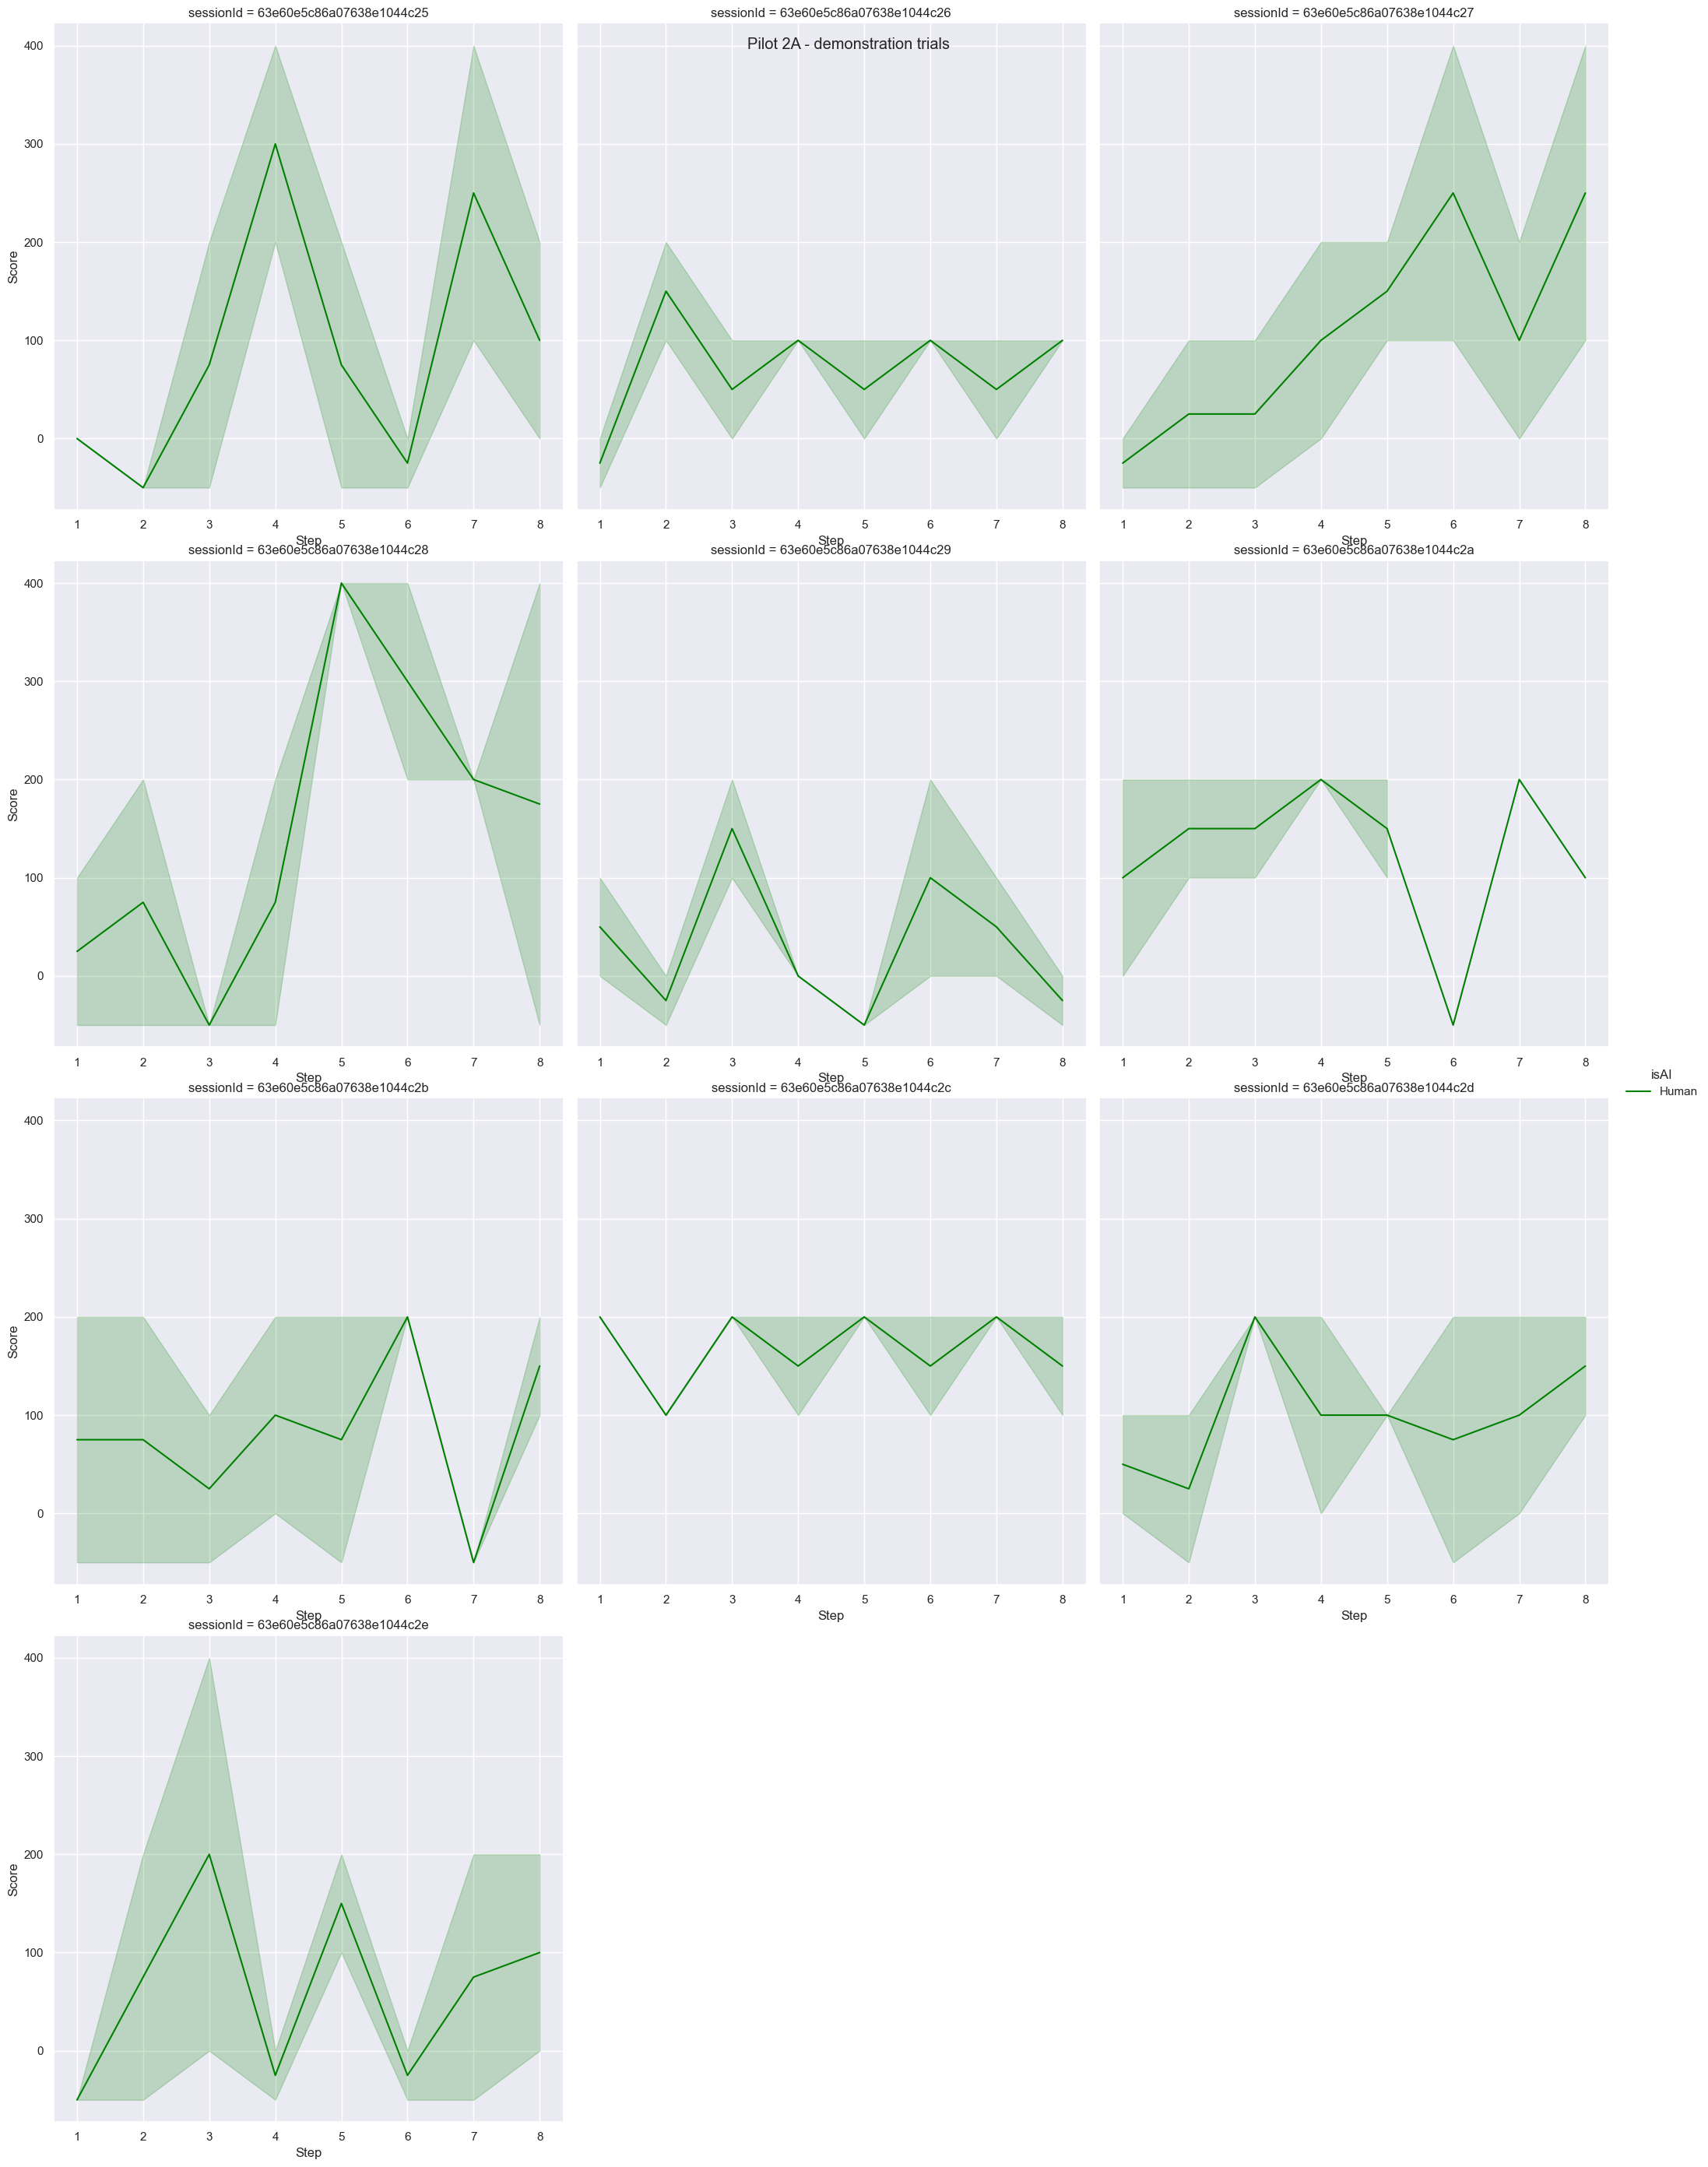

In [85]:
# plot 2A, individual
plot_2A_ind = sns.relplot(data=provaA[provaA['trialType']=='individual'],
                      x="step",
                      y="reward",
                      hue='isAI',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'Human':'green'},
                      height=7,
                      legend='full')
plot_2A_ind.set(xlabel="Step", ylabel="Score")
plot_2A_ind.fig.suptitle("Pilot 2A - individual trials")
# iterate over axes of FacetGrid
for ax in plot_2A_ind.axes.flat:
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels([i+1 for i in range(8)])

# plot 2A, individual
plot_2A_dem = sns.relplot(data=provaA[provaA['trialType']=='demonstration'],
                      x="step",
                      y="reward",
                      hue='isAI',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'Human':'green'},
                      height=7,
                      legend='full')
plot_2A_dem.set(xlabel="Step", ylabel="Score")
plot_2A_dem.fig.suptitle("Pilot 2A - demonstration trials")
# iterate over axes of FacetGrid
for ax in plot_2A_dem.axes.flat:
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels([i+1 for i in range(8)])

plot_2A_ind.savefig(os.path.join(figures_path, '2A_individual_reward_per_step_participants.pdf'), format='pdf', dpi=300)
plot_2A_dem.savefig(os.path.join(figures_path, '2A_demonstration_reward_per_step_participants.pdf'), format='pdf', dpi=300)


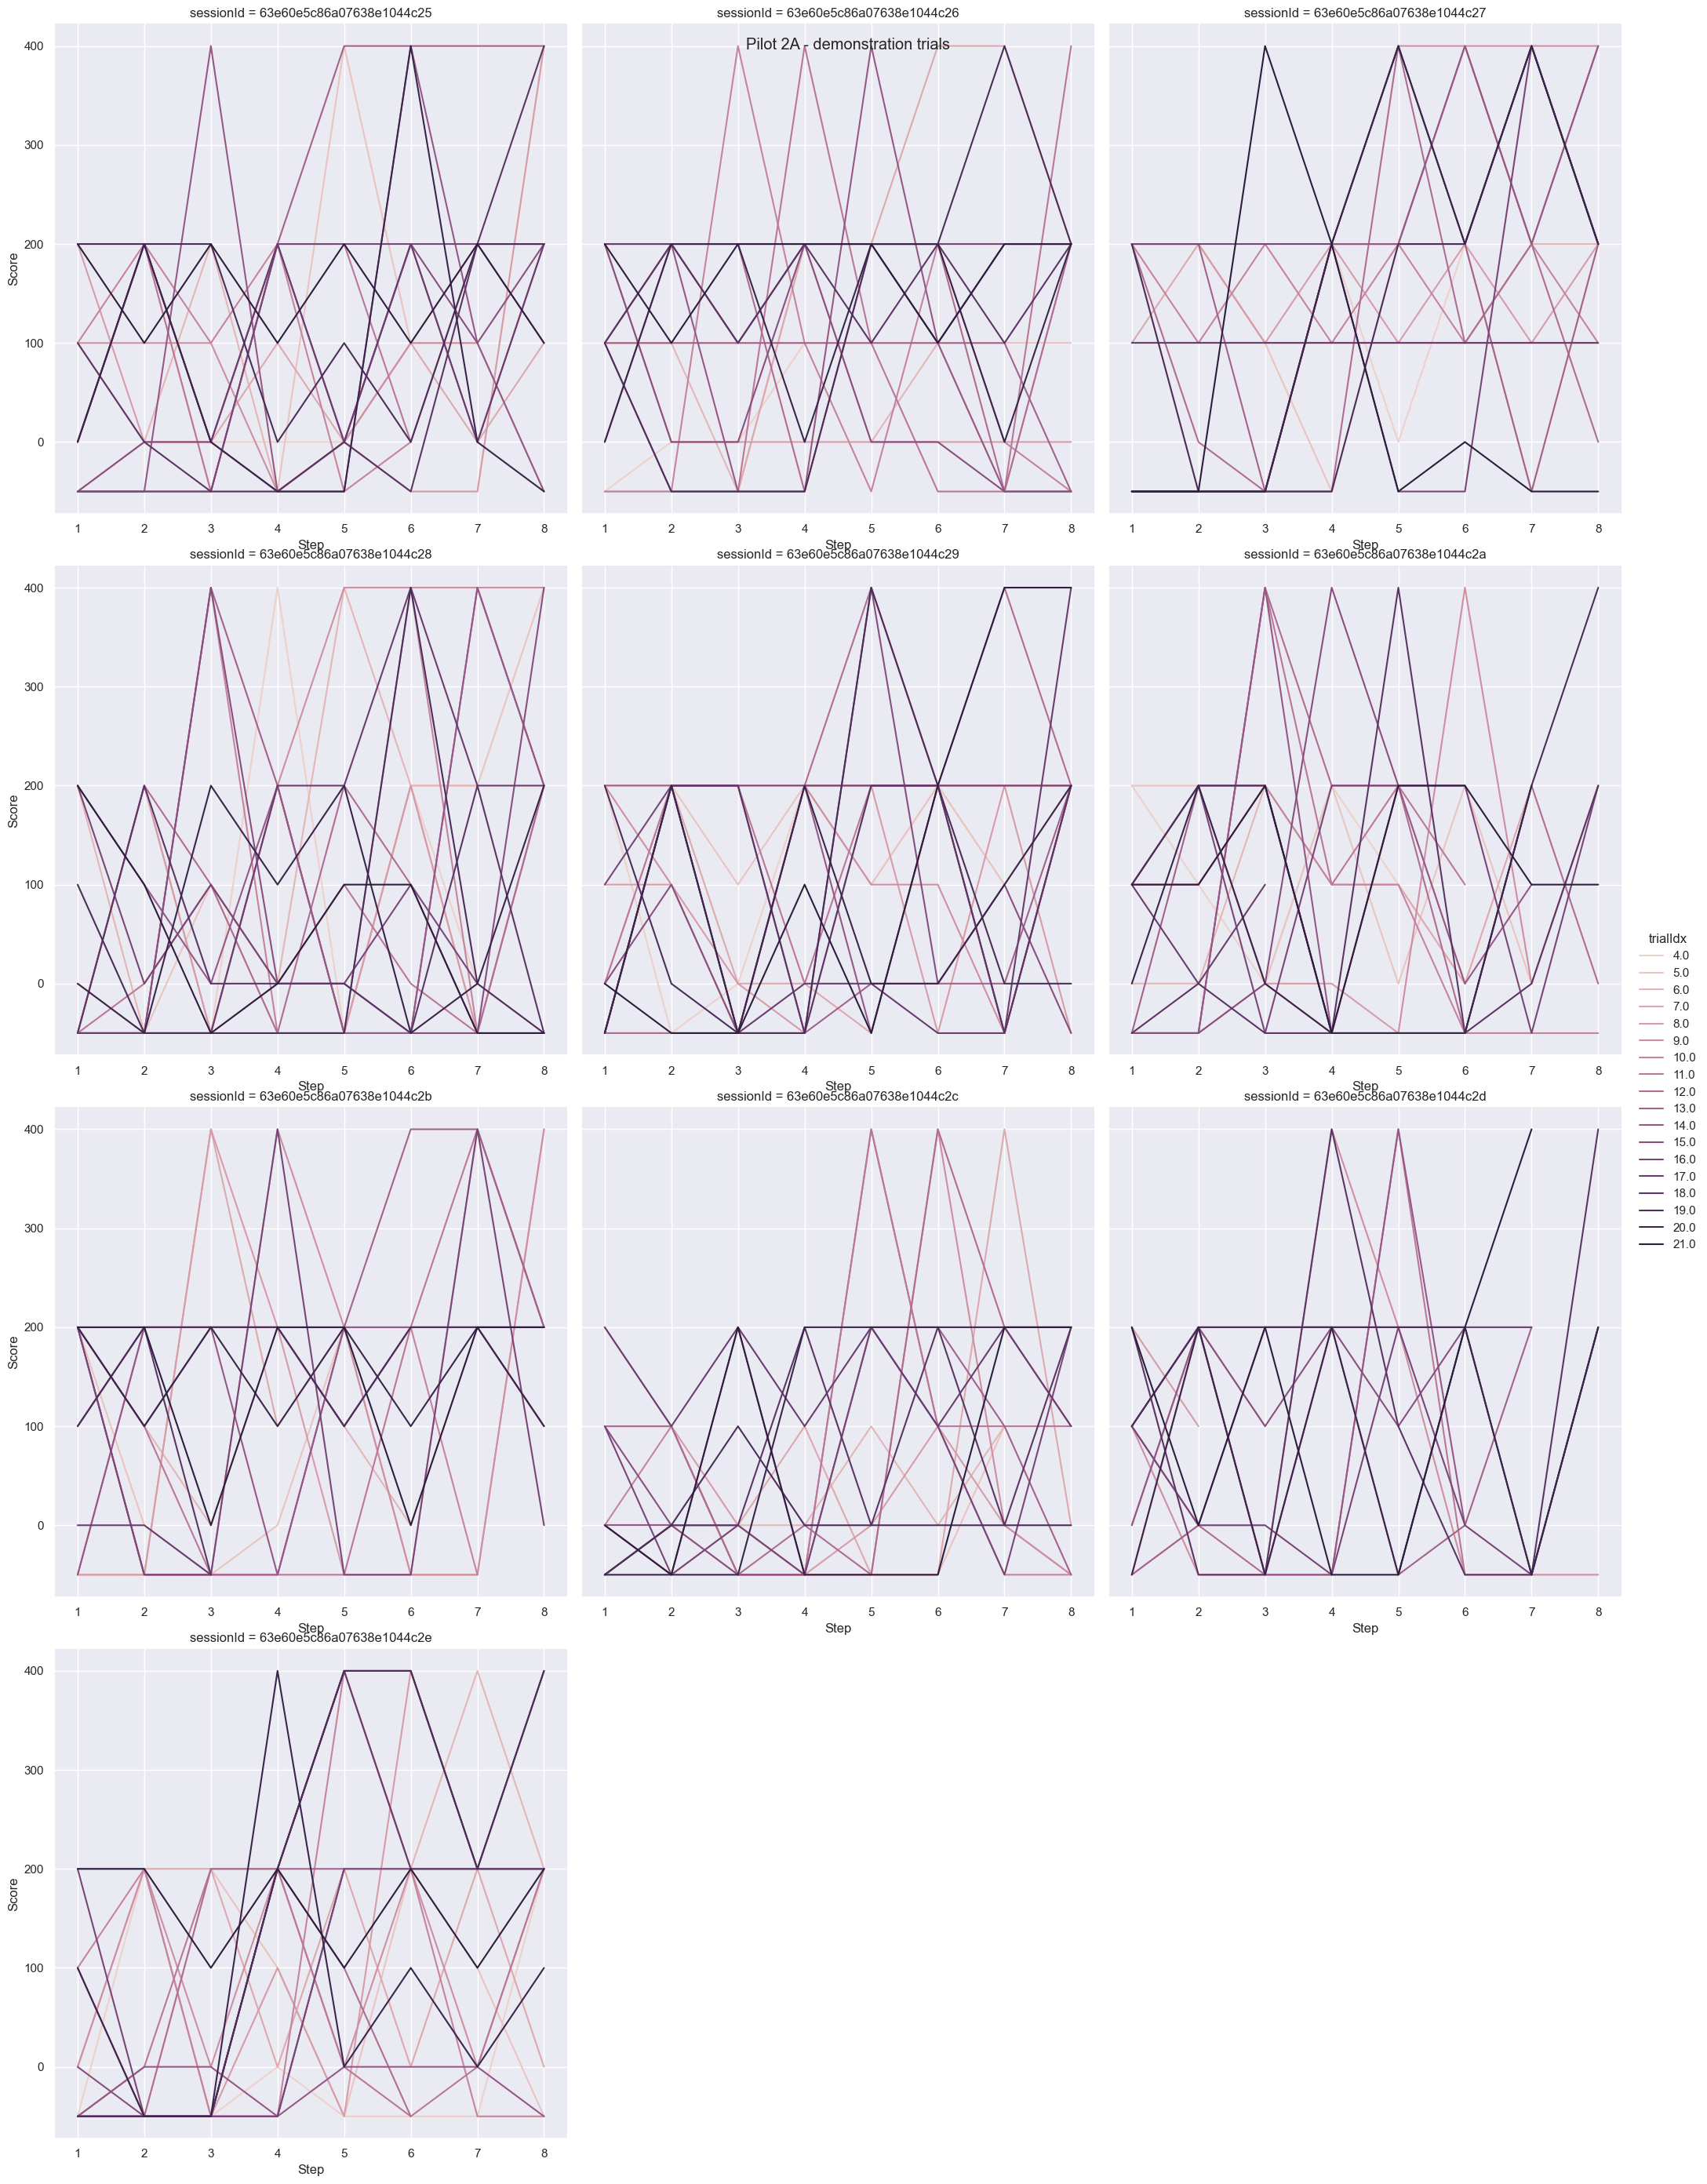

In [86]:
plot_2A_ind_trials = sns.relplot(data=provaA[provaA['trialType']=='individual'],
                      x="step",
                      y="reward",
                      hue='trialIdx',
                      units='trialIdx',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      color='green',
                      height=7,
                      legend='full')
plot_2A_ind_trials.set(xlabel="Step", ylabel="Score")
plot_2A_ind_trials.fig.suptitle("Pilot 2A - demonstration trials")
# iterate over axes of FacetGrid
for ax in plot_2A_ind_trials.axes.flat:
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels([i+1 for i in range(8)])

plot_2A_ind_trials.savefig(os.path.join(figures_path, '2A_individual_reward_per_step_participants_trials.pdf'), format='pdf', dpi=300)

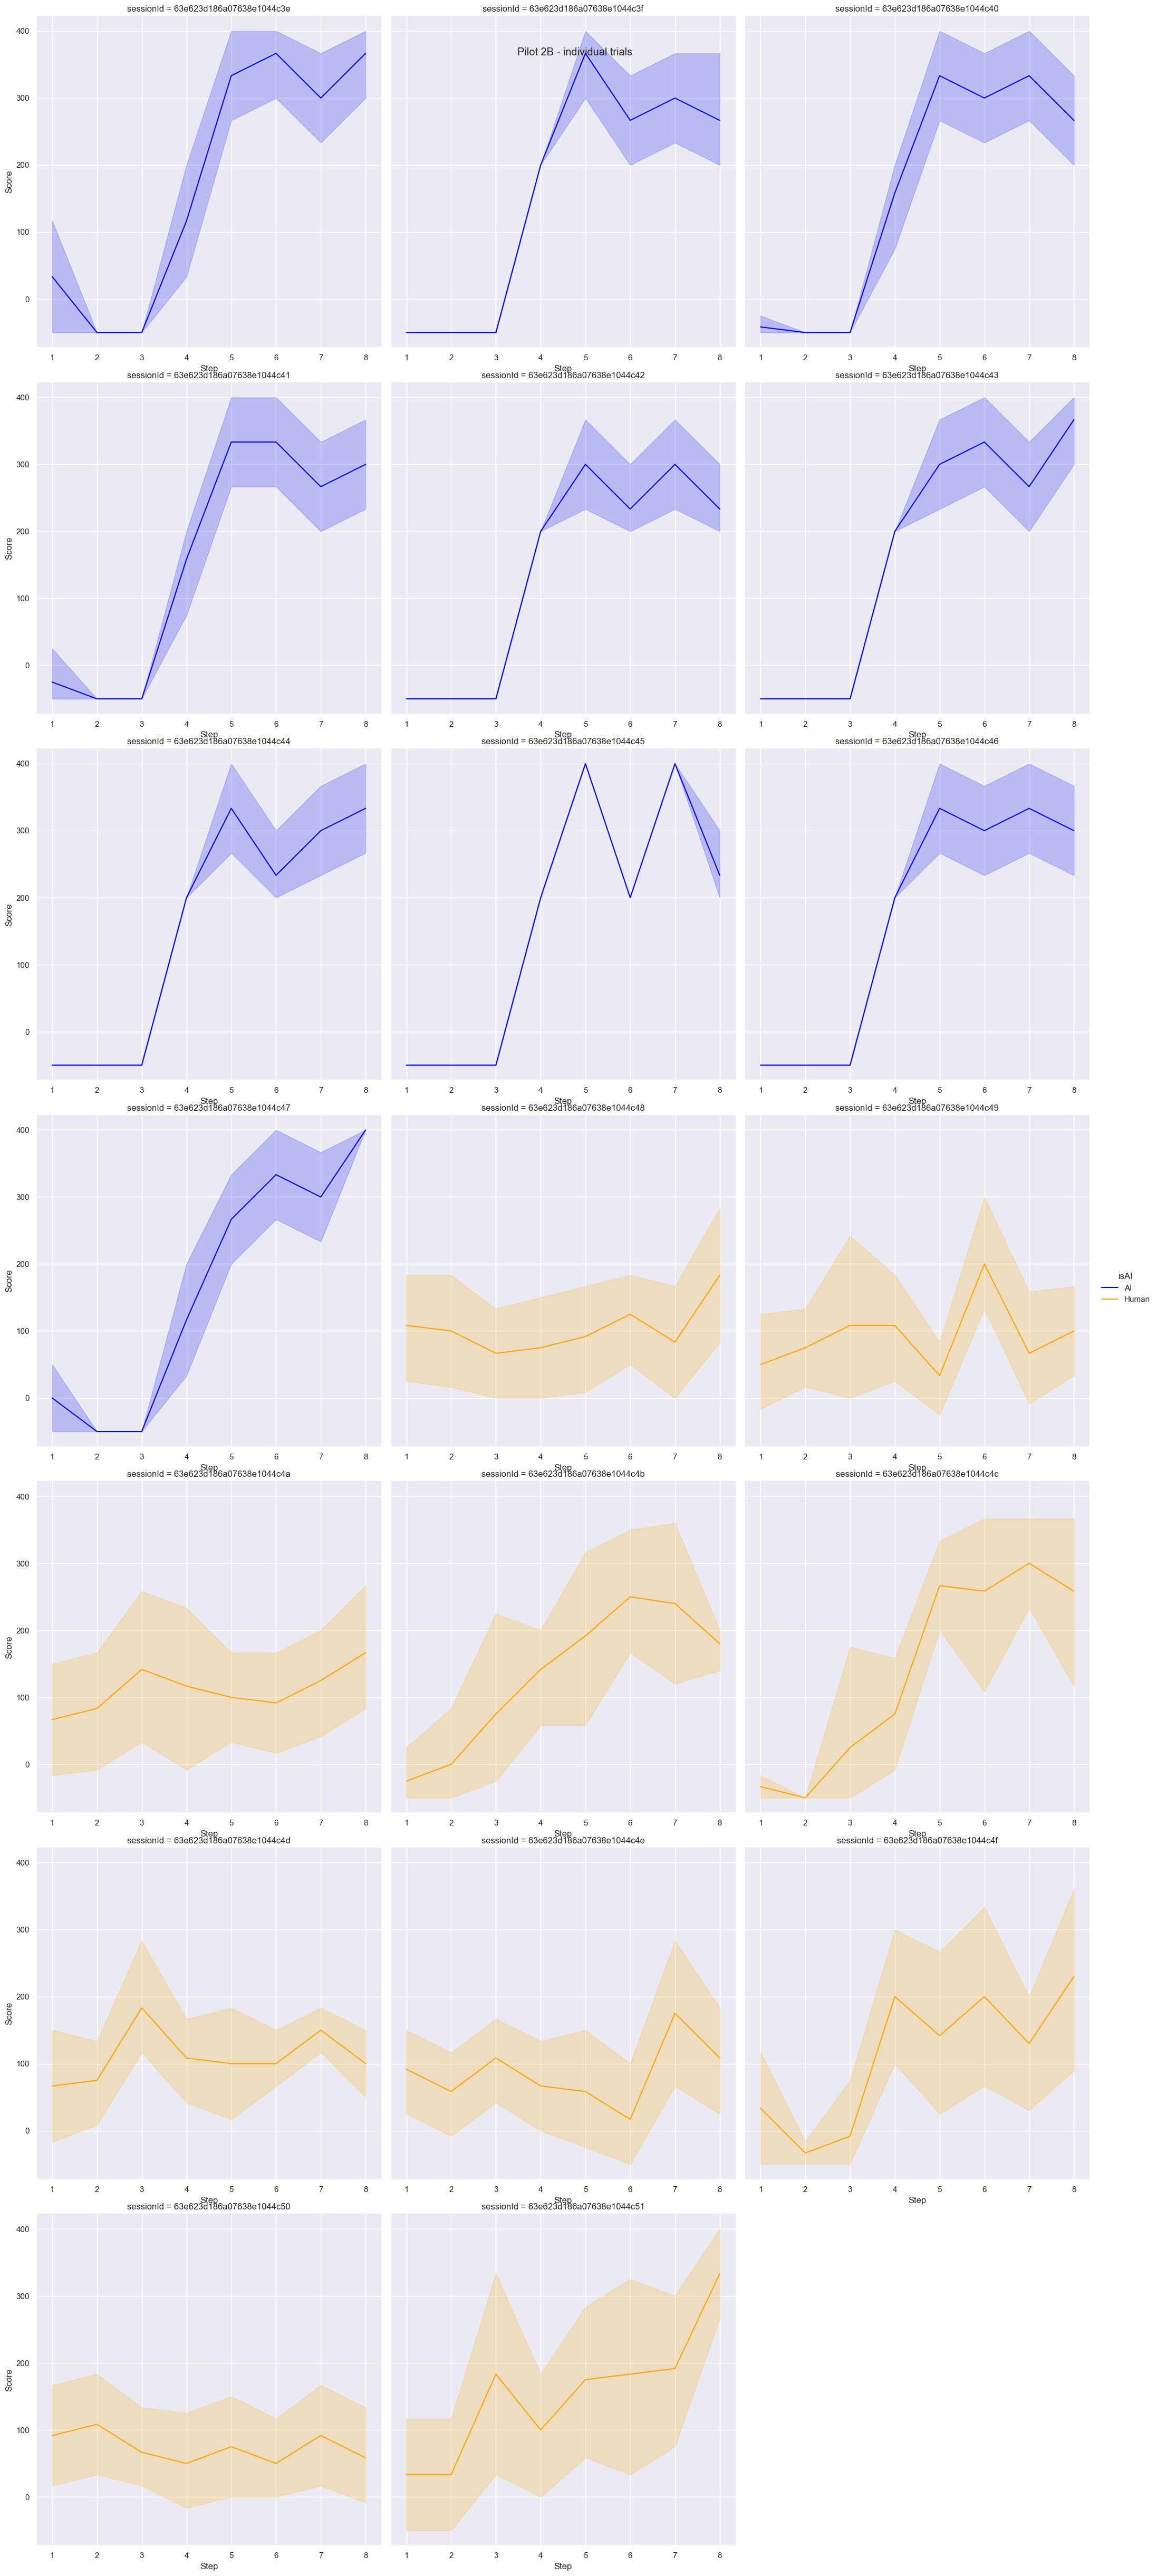

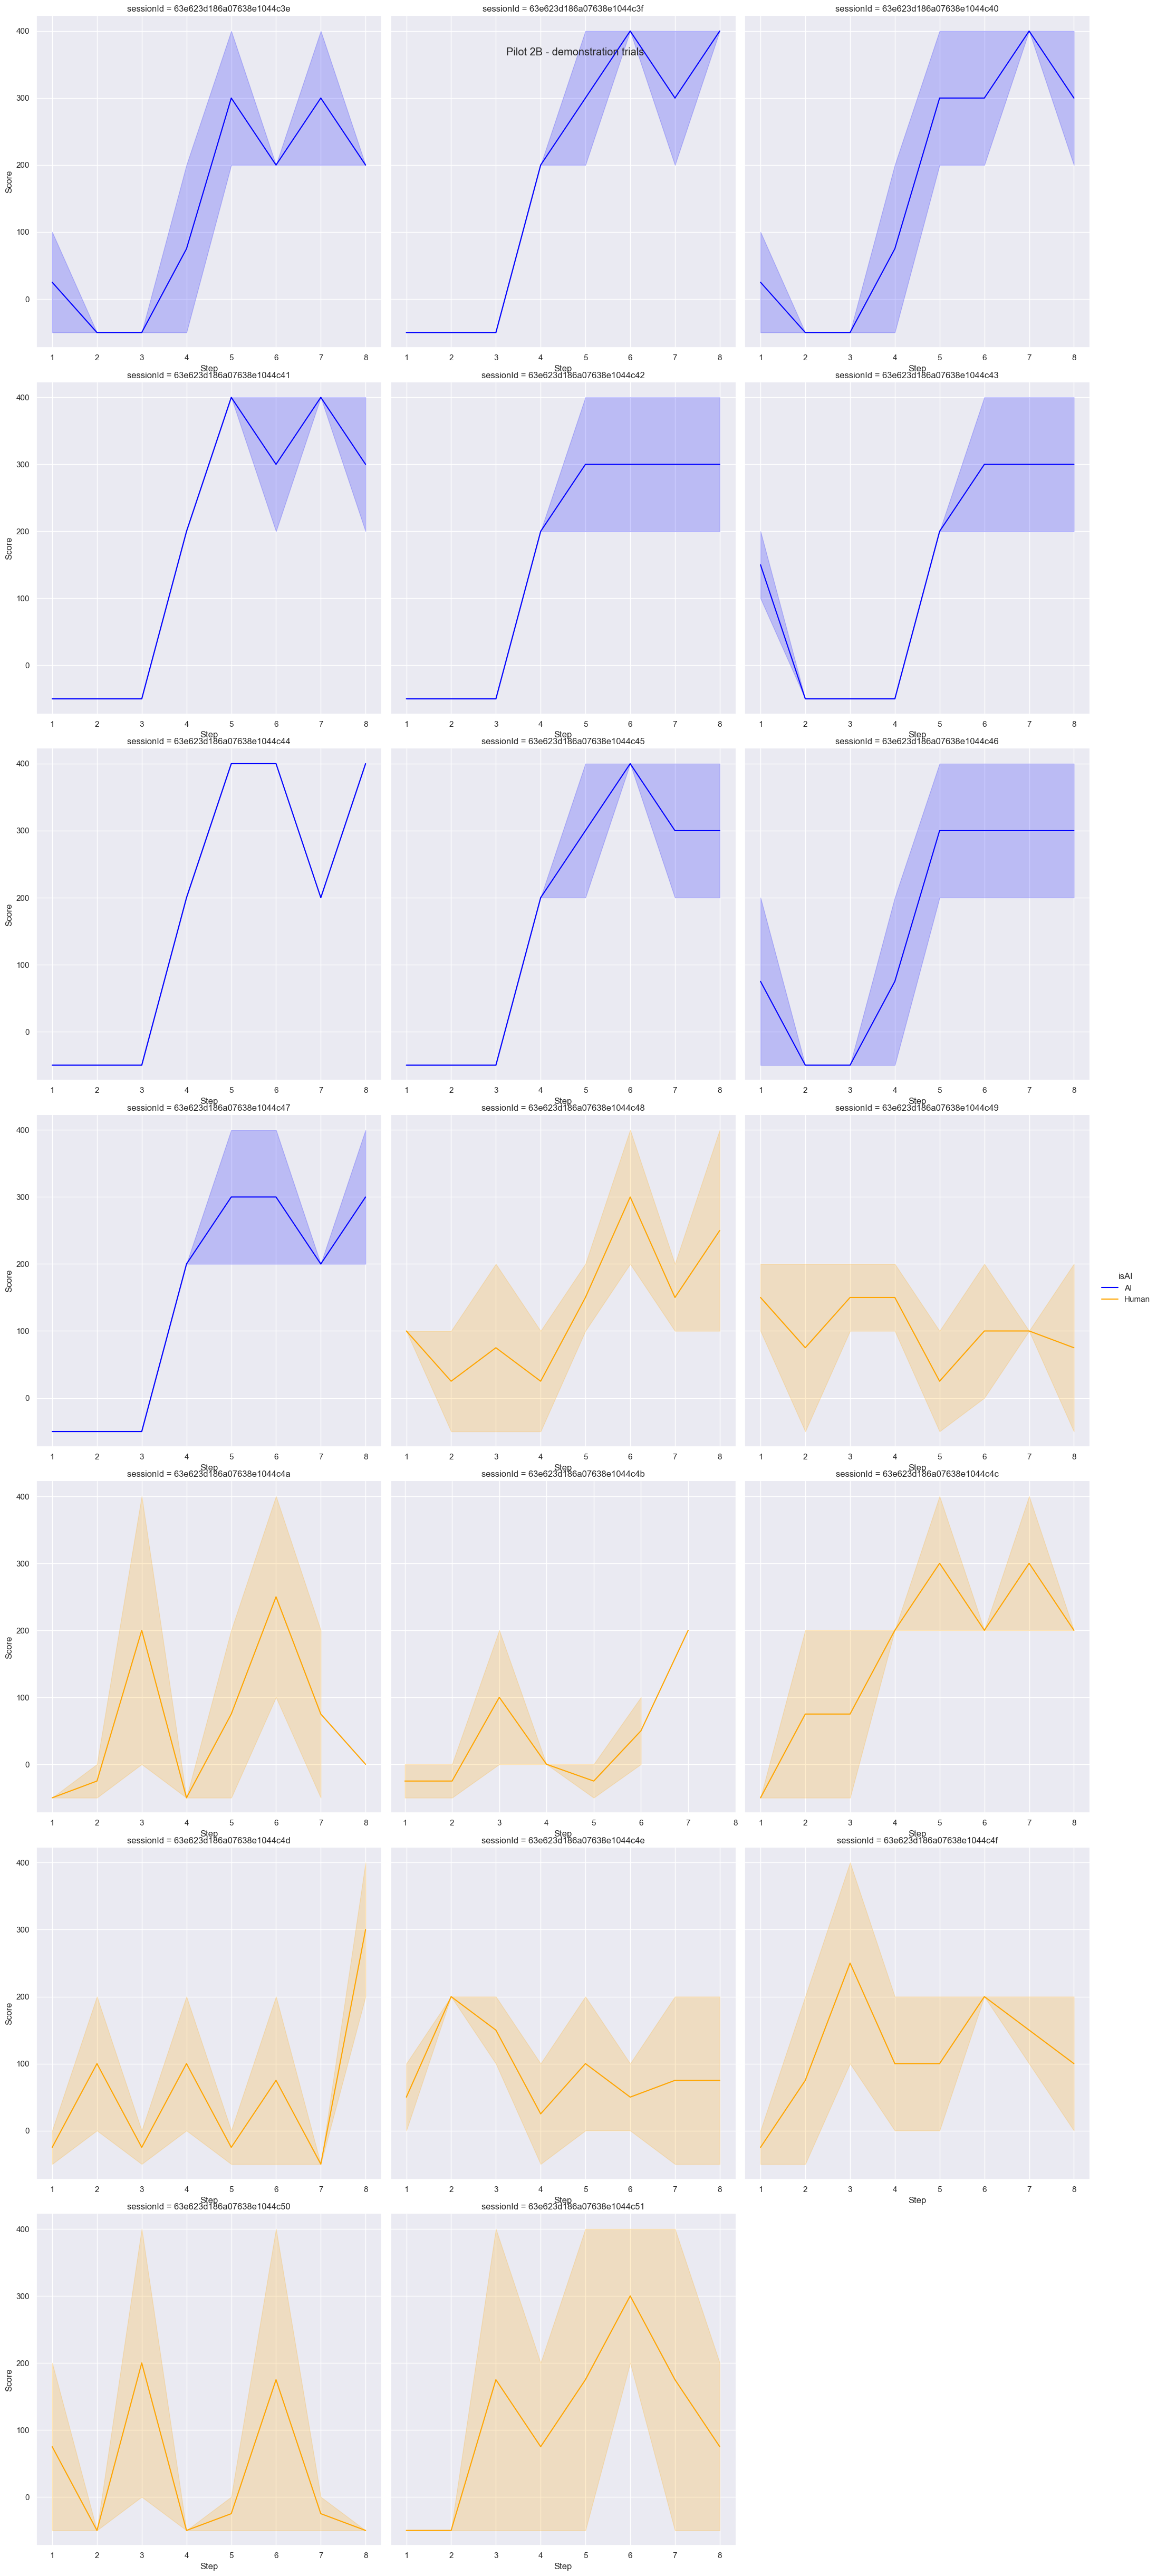

In [82]:
# plot 2B, individual
plot_2B_ind = sns.relplot(data=provaB[provaB['trialType']=='individual'],
                      x="step",
                      y="reward",
                      hue='isAI',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'AI':'blue', 'Human':'orange'},
                      height=7,
                      legend='full')
plot_2B_ind.set(xlabel="Step", ylabel="Score")
plot_2B_ind.fig.suptitle("Pilot 2B - individual trials")
# iterate over axes of FacetGrid
for ax in plot_2B_ind.axes.flat:
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels([i+1 for i in range(8)])

# plot 2B,  demonstration
plot_2B_dem = sns.relplot(data=provaB[provaB['trialType']=='demonstration'],
                      x="step",
                      y="reward",
                      hue='isAI',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'AI':'blue', 'Human':'orange'},
                      height=7,
                      legend='full')
plot_2B_dem.set(xlabel="Step", ylabel="Score")
plot_2B_dem.fig.suptitle("Pilot 2B - demonstration trials")
# iterate over axes of FacetGrid
for ax in plot_2B_dem.axes.flat:
    ax.set_xticks([i+1 for i in range(8)])
    ax.set_xticklabels([i+1 for i in range(8)])

plot_2B_ind.savefig(os.path.join(figures_path, '2B_individual_reward_per_step_participants.pdf'), format='pdf', dpi=300)
plot_2B_dem.savefig(os.path.join(figures_path, '2B_demonstration_reward_per_step_participants.pdf'), format='pdf', dpi=300)

## Performance across trials

## plot trial score over the trial number for each participant (pilot A)

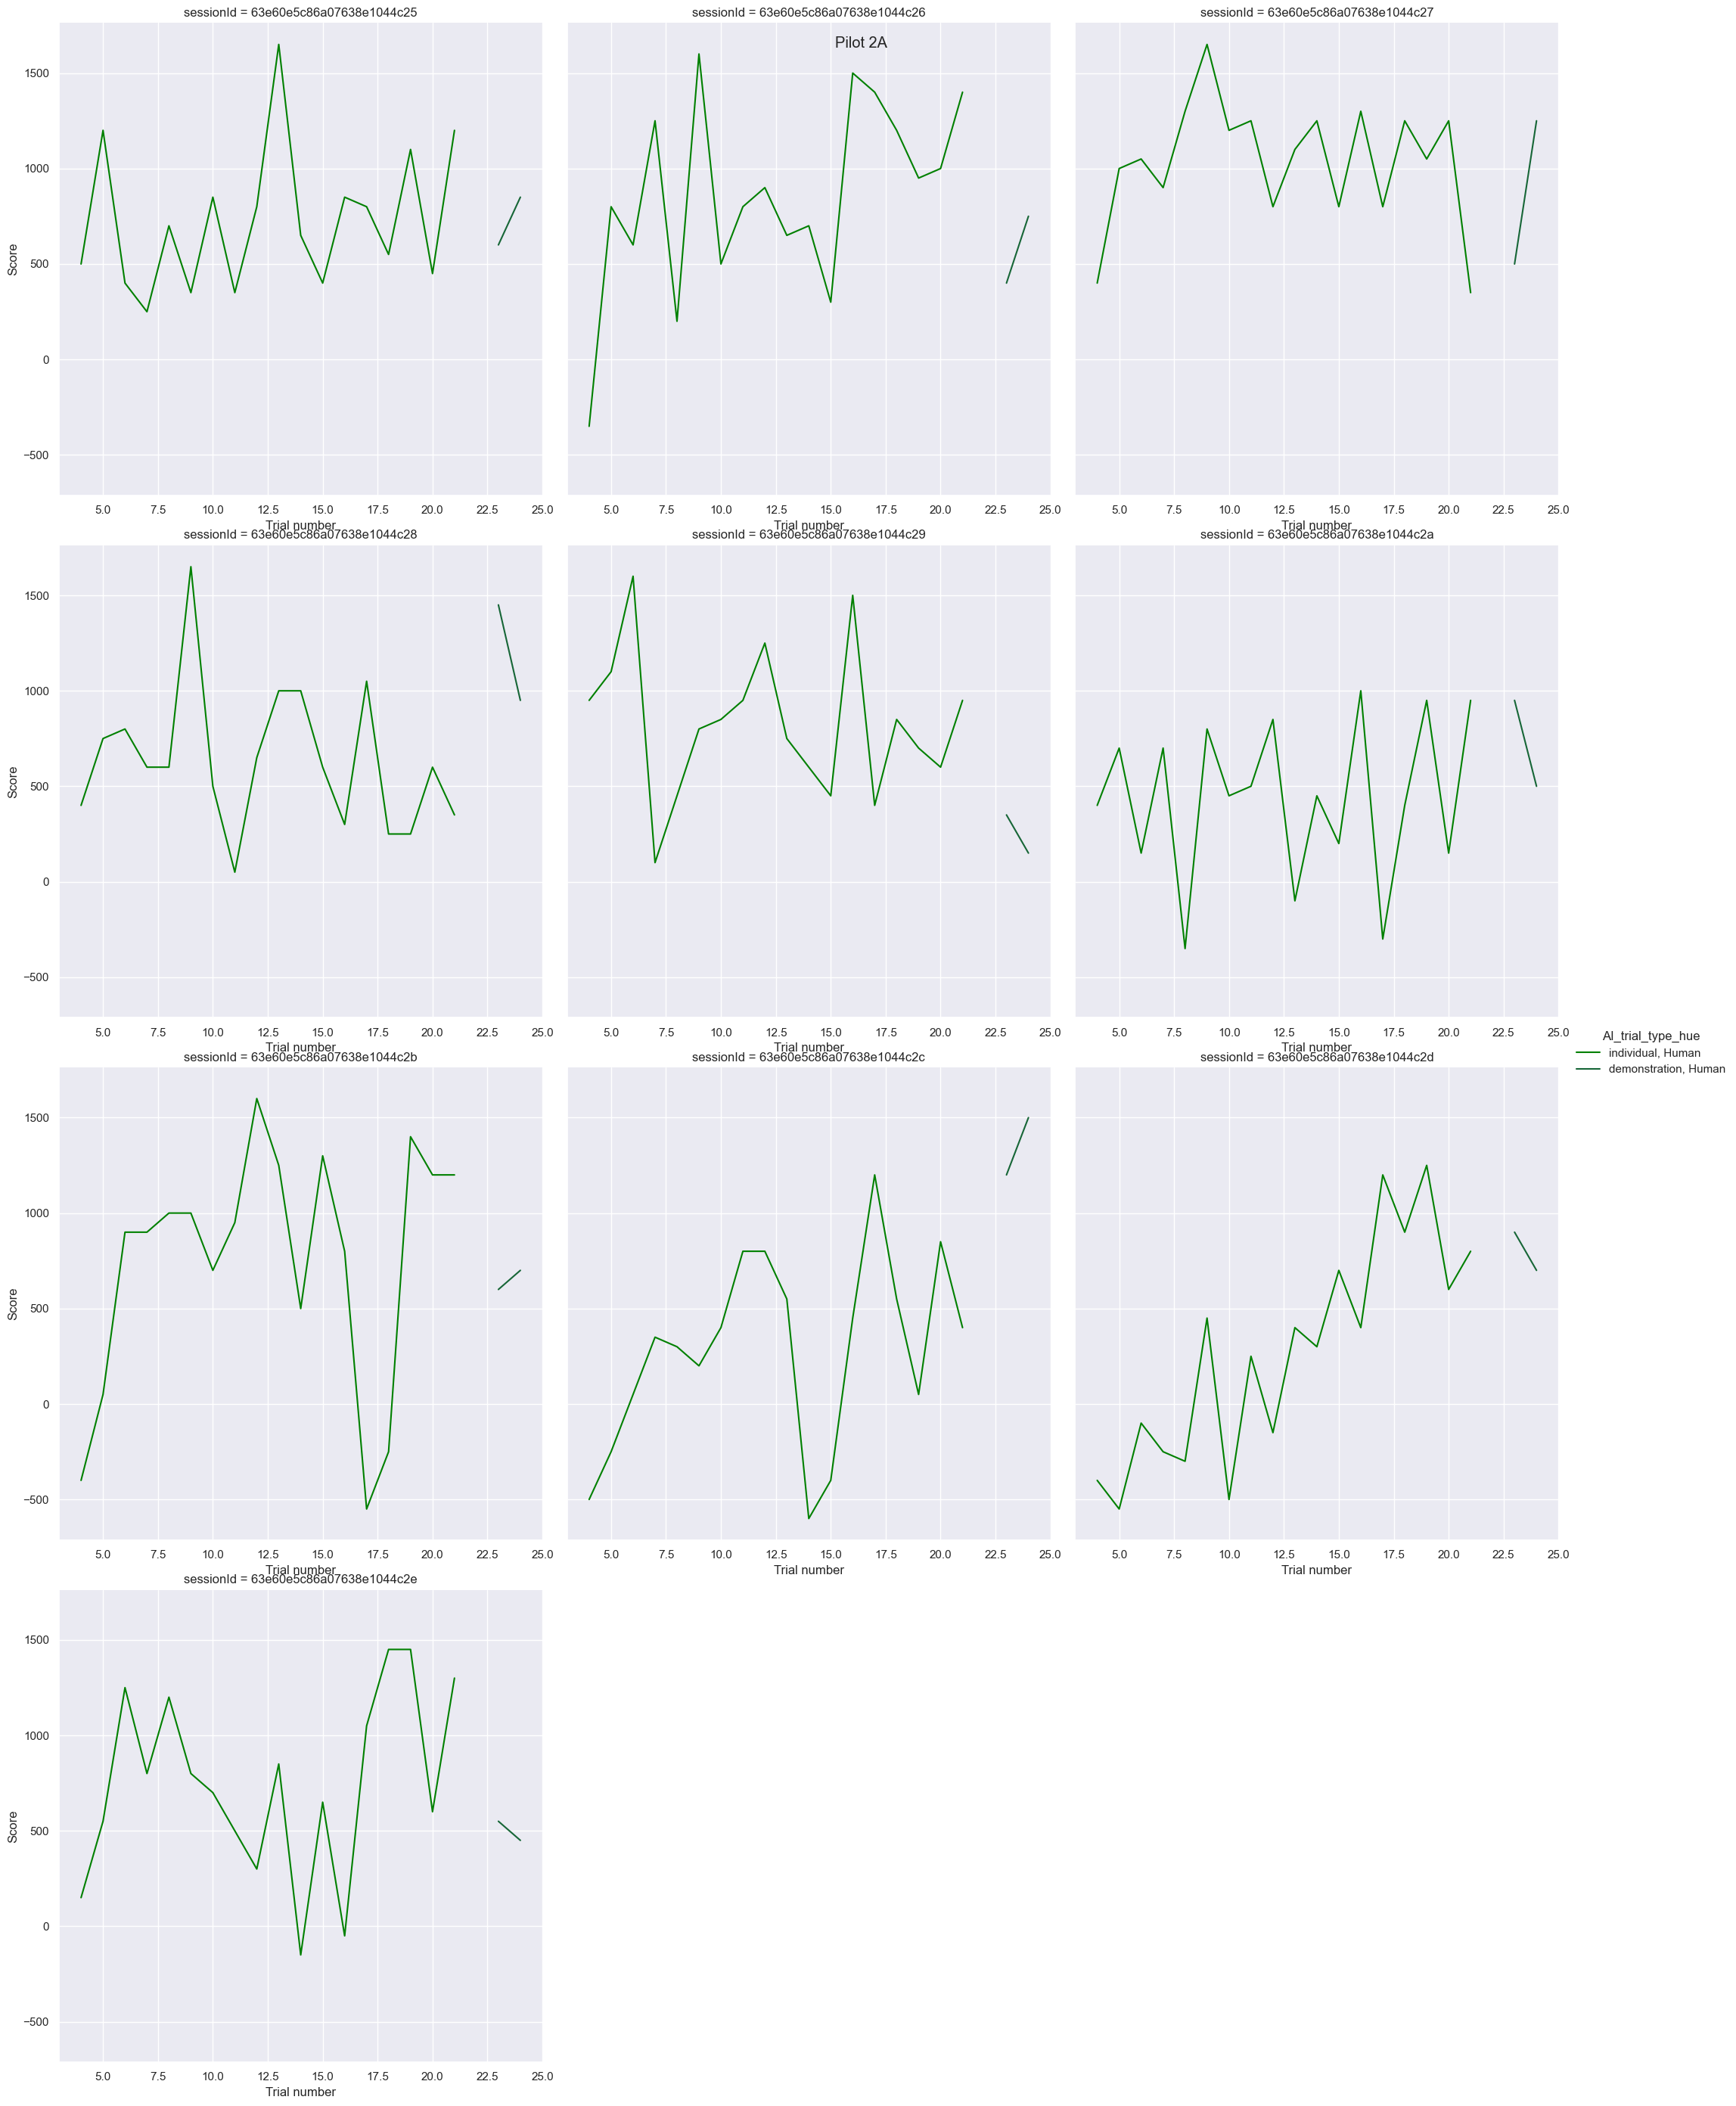

In [12]:
# create plot hue specifically for AI - trial type combo
scores_df['AI_trial_type_hue'] = scores_df['trialType'].astype(str) + ', ' + scores_df['isAI'].astype(str)

fig = sns.relplot(data=scores_df[(scores_df['expName']=='rn-iii-pilot-2A') & scores_df['trialType'].isin(['individual','demonstration'])],
                      x="trialIdx",
                      y="score",
                      hue='AI_trial_type_hue',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'individual, Human':'green', 'demonstration, Human':'#6bdb9c'},
                      height=7,
                      legend='full')
fig.set(xlabel="Trial number", ylabel="Score")
fig.fig.suptitle("Pilot 2A")
# iterate over axes of FacetGrid
#for ax in fig.axes.flat:
#    ax.set_xticks([i+1 for i in range(8)])
#    ax.set_xticklabels([i+1 for i in range(8)])
fig.savefig(os.path.join(figures_path, '2A_score_over_trialIdx_participants.pdf'), format='pdf', dpi=300)

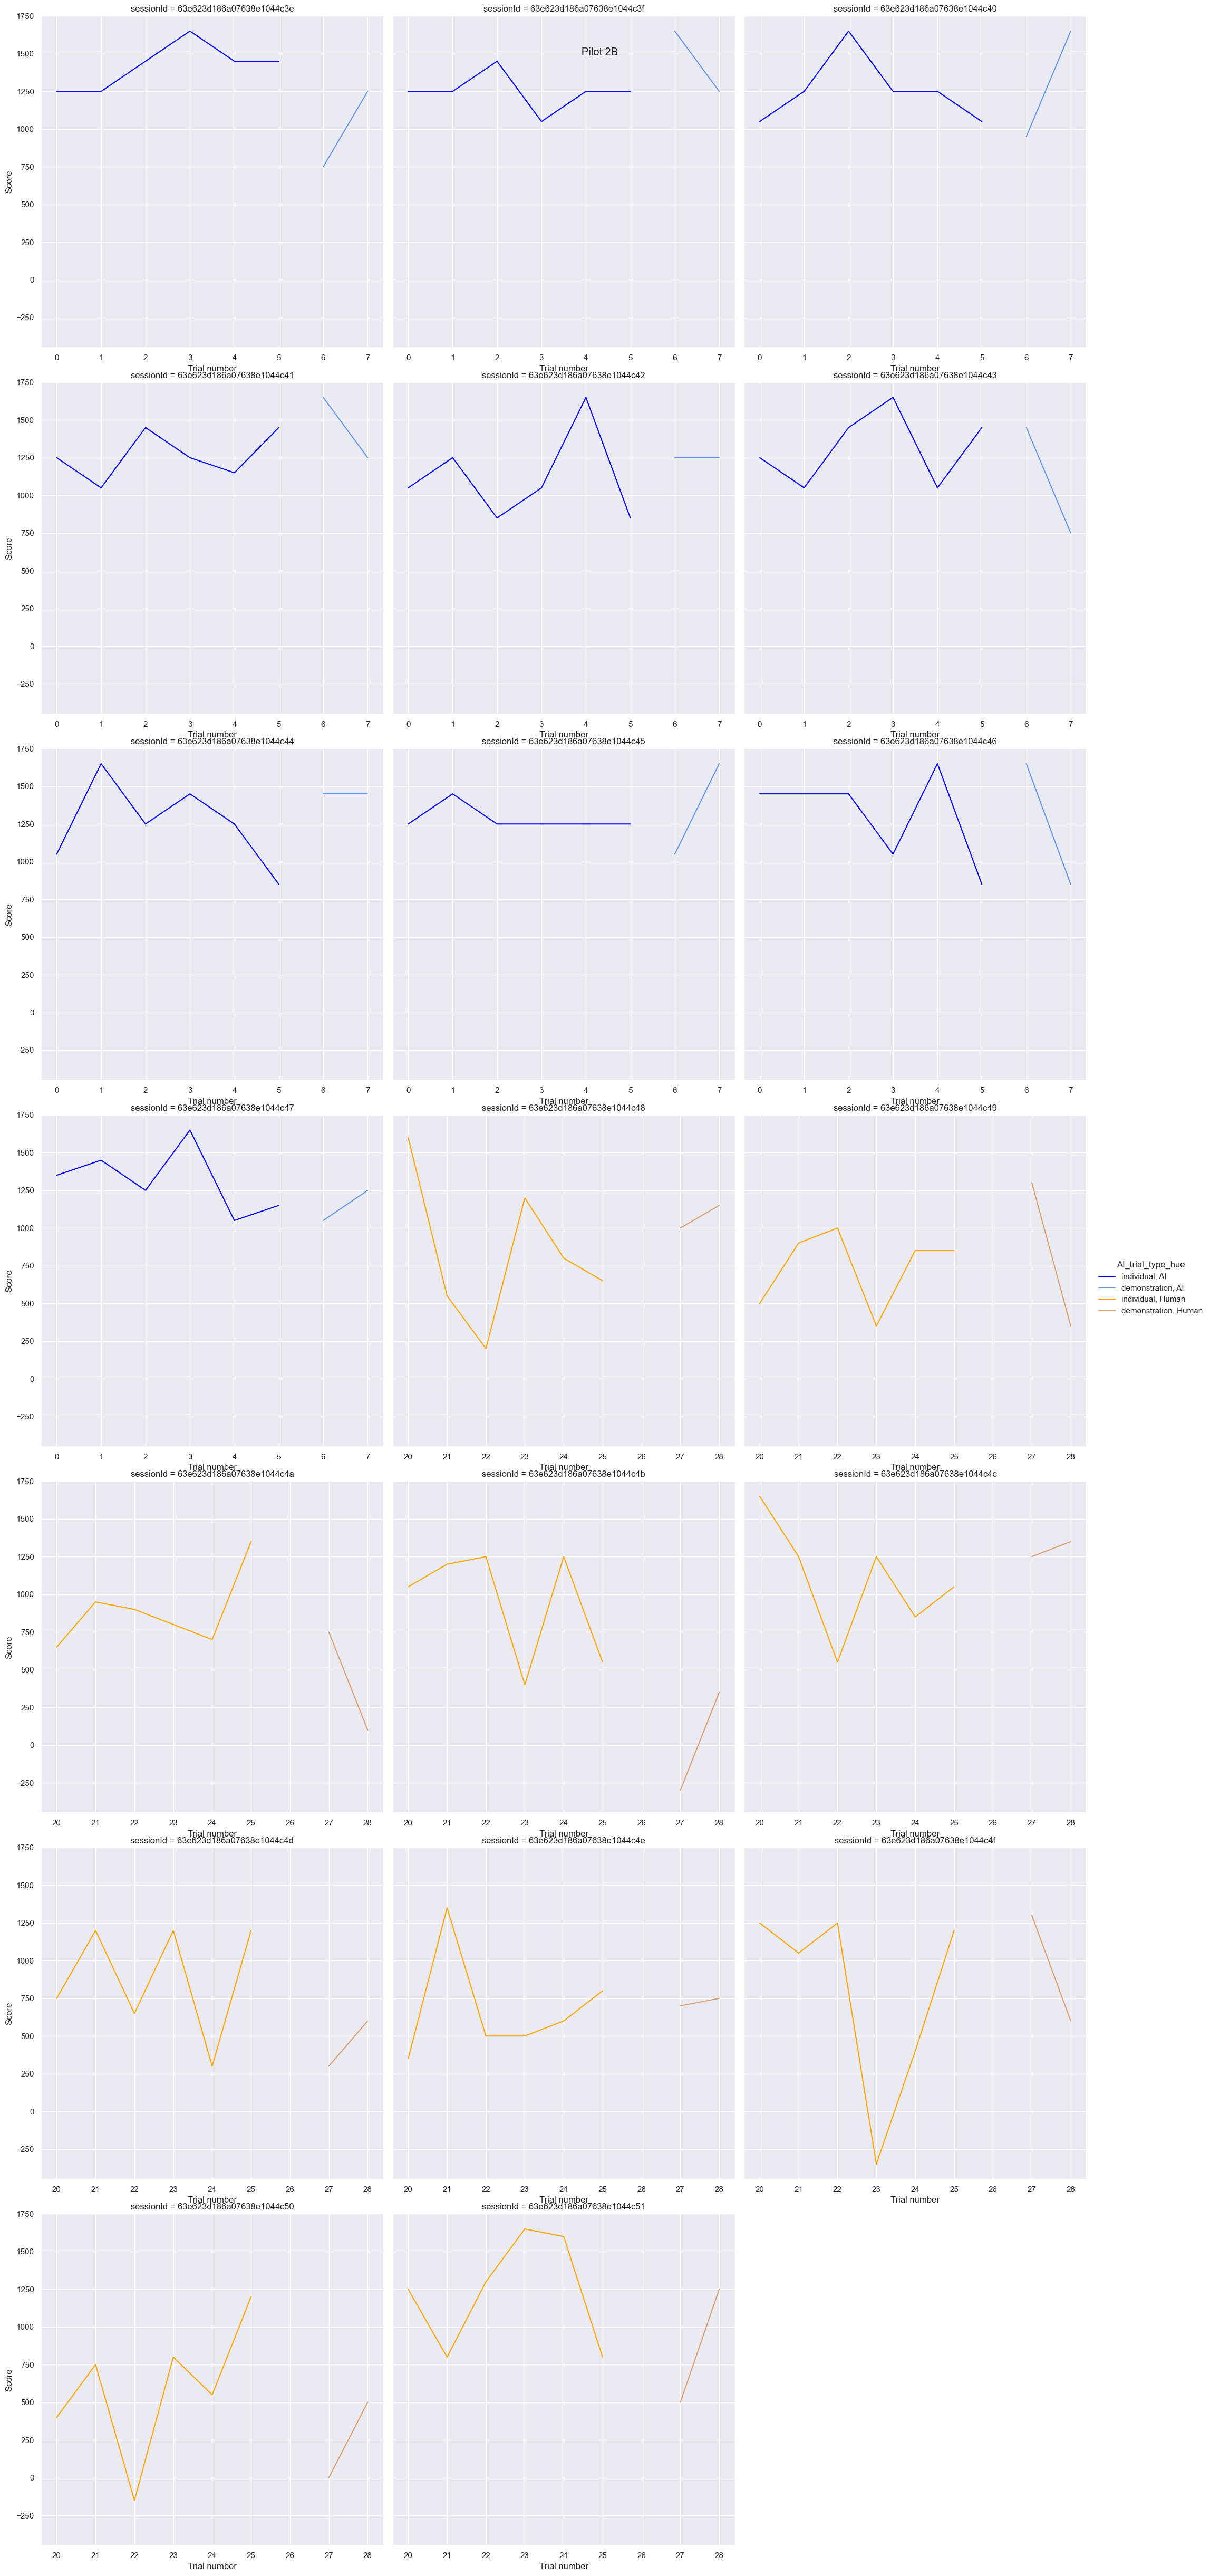

In [13]:
fig = sns.relplot(data=scores_df[(scores_df['expName']=='rn-iii-pilot-2B') & scores_df['trialType'].isin(['individual','demonstration'])],
                      x="trialIdx",
                      y="score",
                      hue='AI_trial_type_hue',
                      col="sessionId",
                      col_wrap=3,
                      kind="line",
                      errorbar='ci',
                      facet_kws=dict(sharey=True,sharex=False),
                      palette={'individual, AI':'blue', 'individual, Human':'orange',
                               'demonstration, AI':'#6397e6', 'demonstration, Human':'#db9d6e'},
                      height=7,
                      legend='full')
fig.set(xlabel="Trial number", ylabel="Score")
fig.fig.suptitle("Pilot 2B")
fig.savefig(os.path.join(figures_path, '2B_score_over_trialIdx_participants.pdf'), format='pdf', dpi=300)

### refactor trial numbers

In [5]:
scores_df_new = scores_df
scores_df_new["relative_trialIdx"] = 0
di = {8: 0, 11: 1, 15: 2, 18: 3}
for s in list(scores_df_new.sessionId.unique()):

    # pilot A conditions
    scores_df_new.loc[(scores_df_new["sessionId"]==s) &
                      (scores_df_new["expName"]=="rn-iii-pilot-1A") &
                     (scores_df_new["trialType"]=="individual"),"relative_trialIdx"] = \
                     scores_df_new[(scores_df_new["sessionId"]==s) &
                                (scores_df_new["expName"]=="rn-iii-pilot-1A") &
                                 (scores_df_new["trialType"]=="individual")]["trialIdx"]-4

    scores_df_new.loc[(scores_df_new["sessionId"]==s) &
                     (scores_df_new["expName"]=="rn-iii-pilot-1A") &
                     (scores_df_new["trialType"]=="demonstration"),"relative_trialIdx"] = \
                     scores_df_new[(scores_df_new["sessionId"]==s) &
                                    (scores_df_new["expName"]=="rn-iii-pilot-1A") &
                                  (scores_df_new["trialType"]=="demonstration")]["trialIdx"]-23

    # pilot B conditions
    scores_df_new.loc[(scores_df_new["sessionId"]==s) &
                     (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                     (scores_df_new["isAI"]==False) &
                     (scores_df_new["trialType"]=="individual"),"relative_trialIdx"] = \
                     scores_df_new[(scores_df_new["sessionId"]==s) &
                                    (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                                    (scores_df_new["isAI"]==False) &
                                    (scores_df_new["trialType"]=="individual")]["trialIdx"]-20

    scores_df_new.loc[(scores_df_new["sessionId"]==s) &
                        (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                        (scores_df_new["isAI"]==False) &
                     (scores_df_new["trialType"]=="demonstration"),"relative_trialIdx"] = \
                     scores_df_new[(scores_df_new["sessionId"]==s) &
                                    (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                                    (scores_df_new["isAI"]==False) &
                                  (scores_df_new["trialType"]=="demonstration")]["trialIdx"]-27

    scores_df_new.loc[(scores_df_new["sessionId"]==s) &
                        (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                        (scores_df_new["isAI"]==False) &
                     (scores_df_new["trialType"]=="social_learning_tryyourself"),"relative_trialIdx"] = \
                    scores_df_new[(scores_df_new["sessionId"]==s) &
                                (scores_df_new["expName"]=="rn-iii-pilot-1B") &
                                (scores_df_new["isAI"]==False) &
                                 (scores_df_new["trialType"]=="social_learning_tryyourself")]["trialIdx"]


scores_df_new.loc[scores_df_new["trialType"]=="social_learning_tryyourself","relative_trialIdx"] = scores_df_new[scores_df_new["trialType"]=="social_learning_tryyourself"]["relative_trialIdx"].map(di)

scores_df_new.tail(30)


Unnamed: 0                 sessionId   isAI          expName  generation  \
376         376  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
377         377  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
378         378  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
379         379  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
380         380  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
381         381  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
382         382  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
383         383  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
384         384  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
385         385  636e575d5fa132cb00661db6  Human  rn-iii-pilot-1A           0   
386         386  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
387         387  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
388         388  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
389         389  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
390         390  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
391         391  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
392         392  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
393         393  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
394         394  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
395         395  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
396         396  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
397         397  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
398         398  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
399         399  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
400         400  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
401         401  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
402         402  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
403         403  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
404         404  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   
405         405  636e575d5fa132cb00661db7  Human  rn-iii-pilot-1A           0   

     trialIdx                    trialType                         networkId  \
376      14.0                   individual  b745e60d896418b18d492fdcd5b2dc9d   
377      15.0                   individual  50131c7ea08e27ee596418019526b77a   
378      16.0                   individual  9798cd7329129cdd9fd1ceb6a9bb66b8   
379      17.0                   individual  394c443fe246c0137651df556e342740   
380      18.0                   individual  9981bc27c13aeb633572f78c07feb247   
381      19.0                   individual  b25e0931f506d89150bb68c0444df585   
382      20.0                   individual  aebfe242498a561d3fd42e921460ddf8   
383      21.0                   individual  fb5fd743703ffeabd62dbb82bc896aa3   
384      23.0                demonstration  85c458ac95f2cb819886fac89dbca3dc   
385      24.0                demonstration  25b94edae8d97f83a32157a40dfdc12c   
386       NaN  social_learning_tryyourself                               NaN   
387       4.0                   individual  e7f967c62f6d853194ddc01cd0f2b5f3   
388       5.0                   individual  0f02599bd49451270f196375ecc4e418   
389       6.0                   individual  67fb1c6a6643f5652372e32035b1a6d2   
390       7.0                   individual  455fcd847e559bd84a42cb29fb2adb52   
391       8.0                   individual  6adc7138e3c489ccfae4b2102fc2e2a3   
392      10.0                   individual  1afaad6d4929ebacac398b31d274cae2   
393      11.0                   individual  a1a253374

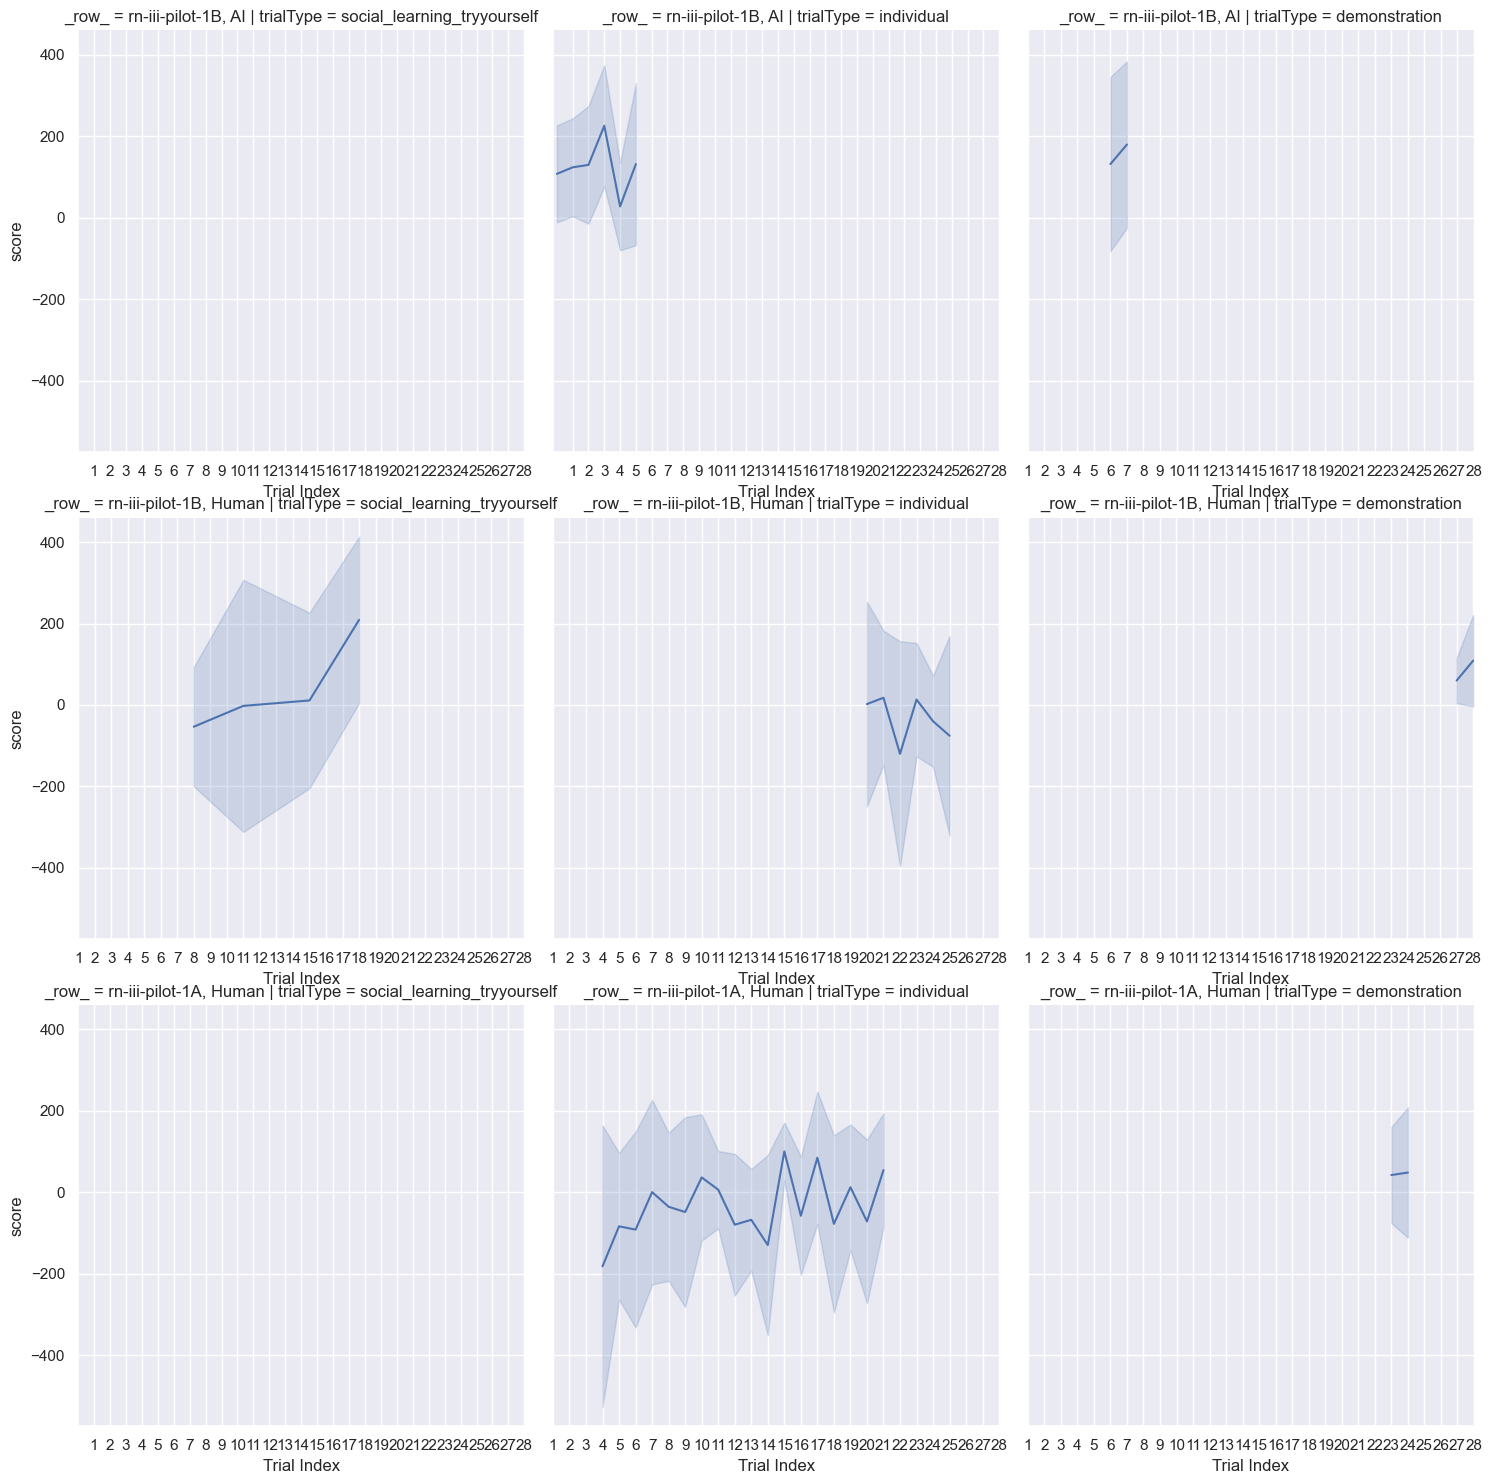

In [8]:
# individual performance over trial idx (score)
prova = sns.relplot(data=scores_df, x="trialIdx", y="score",
                    row=plot_hue, col="trialType",
                    kind="line", errorbar='sd',
                    facet_kws=dict(sharey=True,sharex=False))
# add label to the axis and label to the plot
prova.set(xlabel="Trial Index", ylabel="score")
# iterate over axes of FacetGrid
for ax in prova.axes.flat:
    ax.set_xticks([i+1 for i in range(28)])
    ax.set_xticklabels([i+1 for i in range(28)])

if to_save_plots:
    prova.savefig(os.path.join(figures_path, 'score_over_trial_idx_units1.pdf'), format='pdf', dpi=300)
    prova.savefig(os.path.join(figures_path, 'score_over_trial_idx_units1.png'), format='png', dpi=300)

## Level plots
### Distribution of max level reached per experiment and per trial type

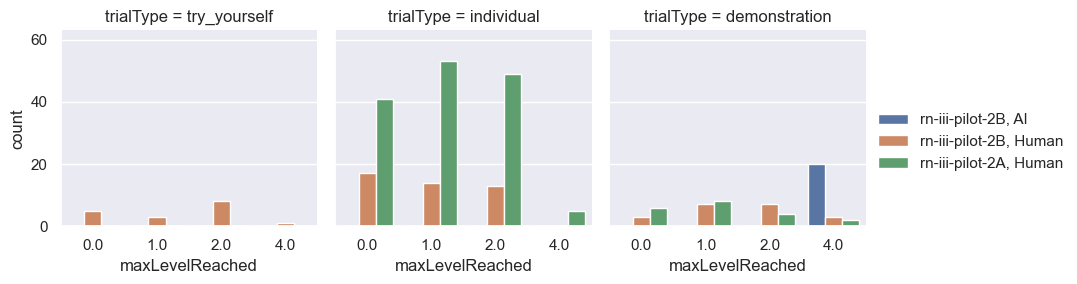

In [32]:
g = sns.FacetGrid(scores_df, col="trialType")
g.map_dataframe(sns.countplot, x="maxLevelReached", hue=plot_hue,
                palette=sns.color_palette())
g.add_legend()

if to_save_plots:
    g.savefig(os.path.join(figures_path, 'maxLevel_dist_trial_type.pdf'), format='pdf', dpi=300)
    g.savefig(os.path.join(figures_path, 'maxLevel_dist_trial_type.png'), format='png', dpi=300)

## share of participants reaching highest level split by condition and trial type

In [37]:
# for pilot 2A
maxLevel_2A = scores_dfA[scores_dfA['trialType'].isin(['individual','demonstration'])].groupby(by=['sessionId','plot_hue','trialType'])['maxLevelReached'].value_counts(normalize=True).to_frame('maxLevelShare').reset_index()
maxLevel_2A_trialIdx = scores_dfA[scores_dfA['trialType'].isin(['individual','demonstration'])].groupby(by=['sessionId','plot_hue','trialIdx'])['maxLevelReached'].value_counts(normalize=True).to_frame('maxLevelShare').reset_index()

# for pilot 2B
maxLevel_2B = scores_dfB[(scores_dfB['trialType'].isin(['individual','demonstration'])) & (scores_dfB['isAI']=='Human') ].groupby(by=['sessionId','plot_hue','trialType'])['maxLevelReached'].value_counts(normalize=True).to_frame('maxLevelShare').reset_index()
maxLevel_2B_trialIdx = scores_dfB[(scores_dfB['trialType'].isin(['individual','demonstration'])) & (scores_dfB['isAI']=='Human') ].groupby(by=['sessionId','plot_hue','trialIdx'])['maxLevelReached'].value_counts(normalize=True).to_frame('maxLevelShare').reset_index()
# maxLevel_2B[maxLevel_2B['maxLevelReached']==4]
maxLevel_2B_trialIdx

sessionId                plot_hue  trialIdx  \
0   63e623d186a07638e1044c48  rn-iii-pilot-2B, Human      20.0   
1   63e623d186a07638e1044c48  rn-iii-pilot-2B, Human      21.0   
2   63e623d186a07638e1044c48  rn-iii-pilot-2B, Human      22.0   
3   63e623d186a07638e1044c48  rn-iii-pilot-2B, Human      23.0   
4   63e623d186a07638e1044c48  rn-iii-pilot-2B, Human      24.0   
..                       ...                     ...       ...   
75  63e623d186a07638e1044c51  rn-iii-pilot-2B, Human      23.0   
76  63e623d186a07638e1044c51  rn-iii-pilot-2B, Human      24.0   
77  63e623d186a07638e1044c51  rn-iii-pilot-2B, Human      25.0   
78  63e623d186a07638e1044c51  rn-iii-pilot-2B, Human      27.0   
79  63e623d186a07638e1044c51  rn-iii-pilot-2B, Human      28.0   

    maxLevelReached  maxLevelShare  
0               0.0            1.0  
1               1.0            1.0  
2               2.0            1.0  
3               0.0            1.0  
4               0.0            1.0  
..              ...            ...  
75              4.0            1.0  
76              0.0            1.0  
77              2.0            1.0  
78              2.0            1.0  
79              4.0            1.0  

[80 rows x 5 columns]

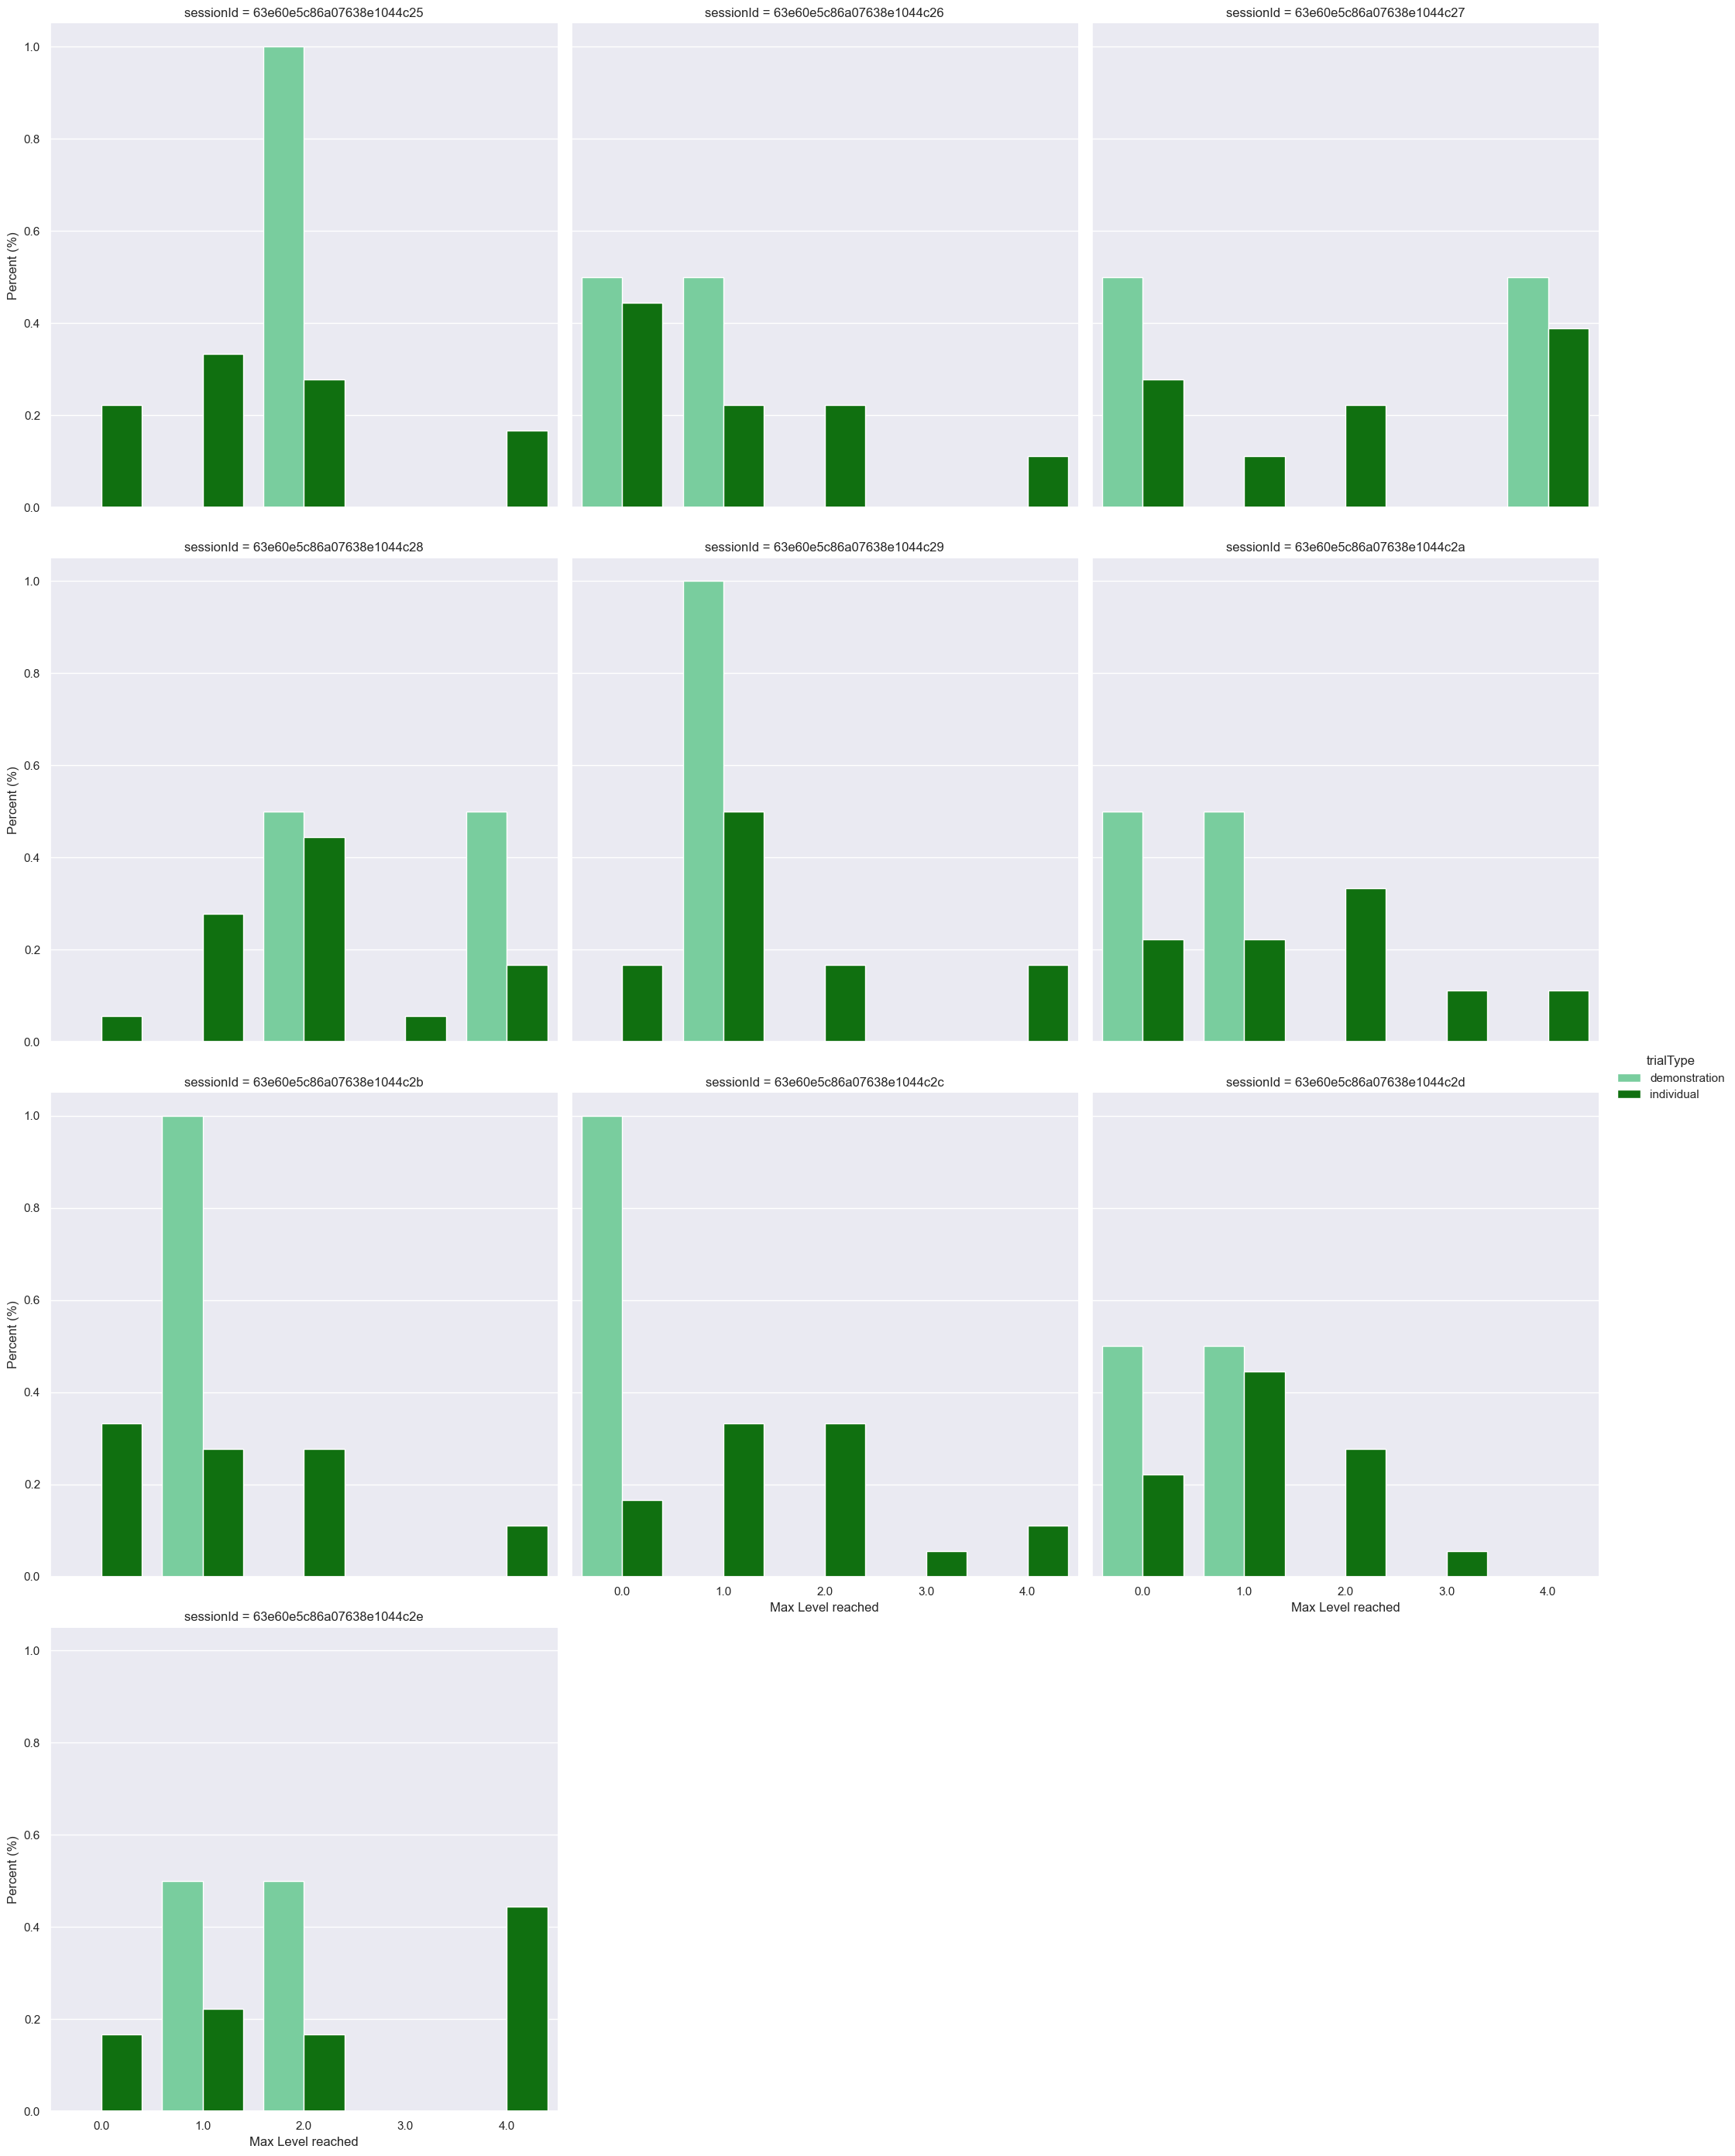

In [35]:
fig5 = sns.catplot(maxLevel_2A,
                   x="maxLevelReached",
                   y="maxLevelShare",
                   hue='trialType',
                   col="sessionId",
                   col_wrap=3,
                   kind='bar',
                   facet_kws=dict(sharey=True,sharex=True),
                   palette={'individual':'green', 'demonstration':'#6bdb9c'},
                   height=7,
                   legend='full'
                   )

# add label to the axis and label to the plot
fig5.set(xlabel="Max Level reached", ylabel="Percent (%)")
fig5.savefig(os.path.join(figures_path, '2A_maxLevelShare_participants.pdf'), format='pdf', dpi=300)

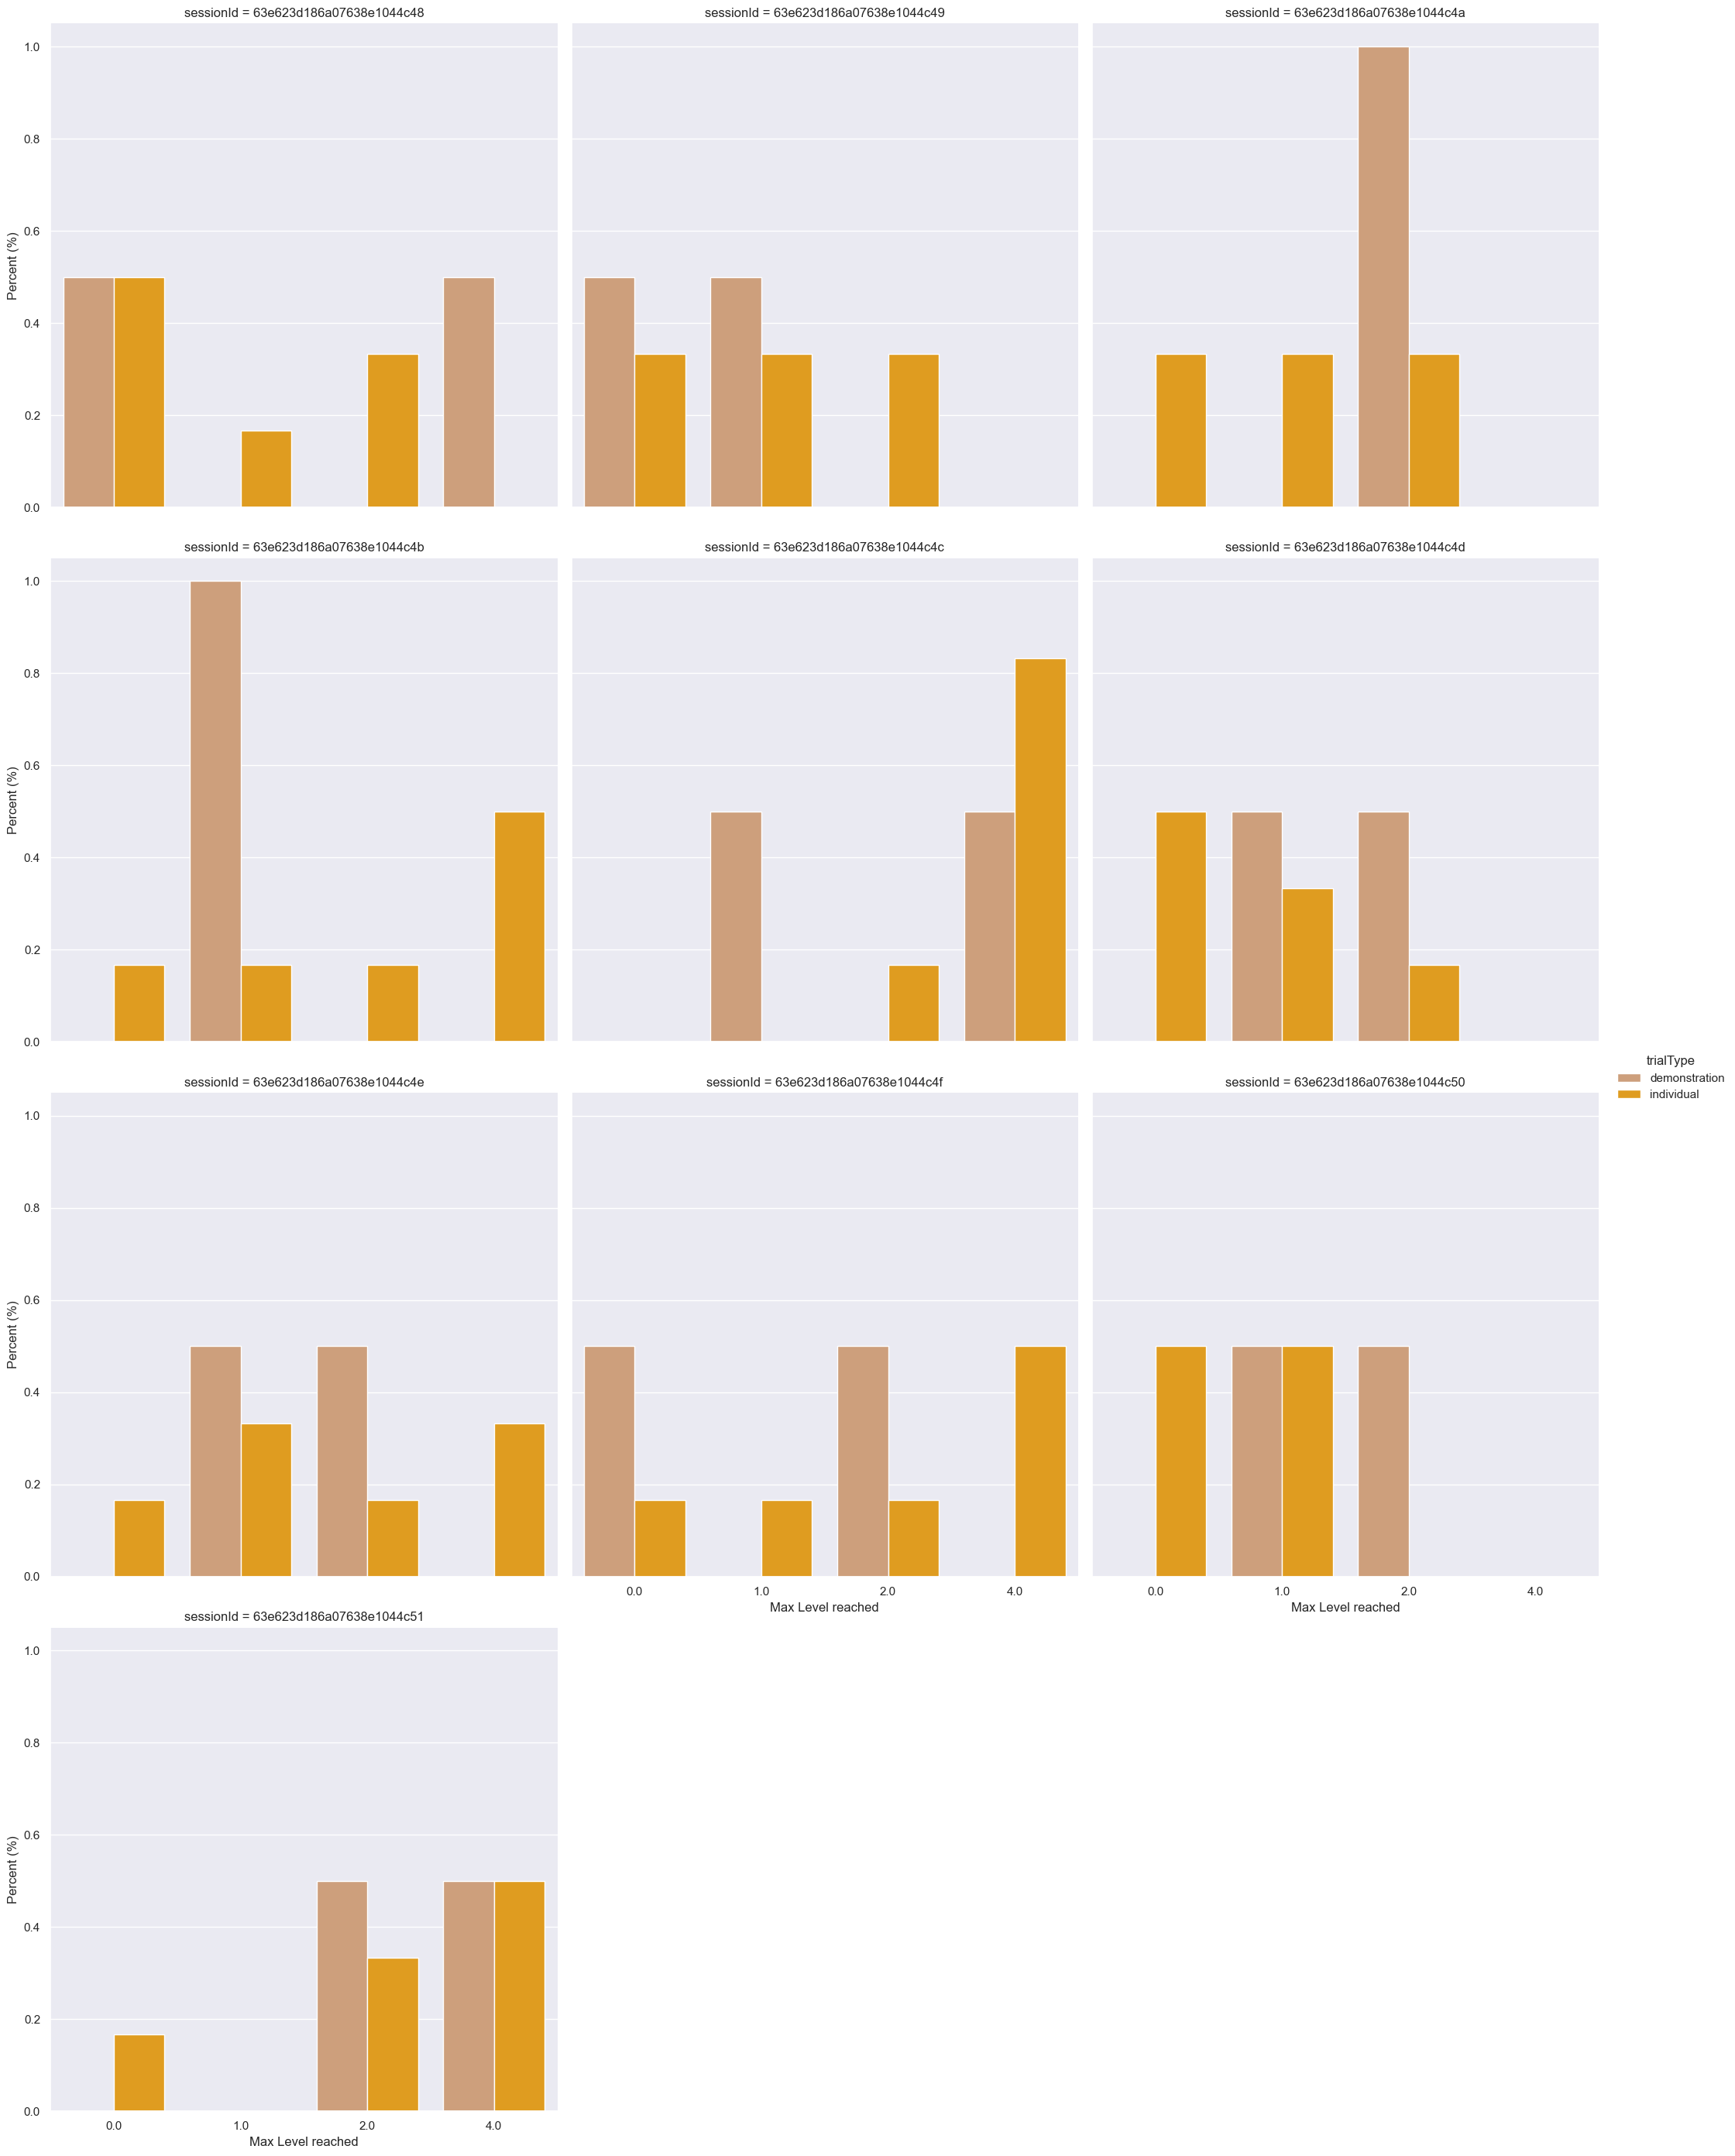

In [36]:
fig6 = sns.catplot(maxLevel_2B,
                   x="maxLevelReached",
                   y="maxLevelShare",
                   hue='trialType',
                   col="sessionId",
                   col_wrap=3,
                   kind='bar',
                   facet_kws=dict(sharey=True,sharex=True),
                   palette={'individual':'orange','demonstration':'#db9d6e'},
                   height=7,
                   legend='full'
                   )

# add label to the axis and label to the plot
fig6.set(xlabel="Max Level reached", ylabel="Percent (%)")
fig6.savefig(os.path.join(figures_path, '2B_maxLevelShare_participants.pdf'), format='pdf', dpi=300)

### max level reached (individual trials)

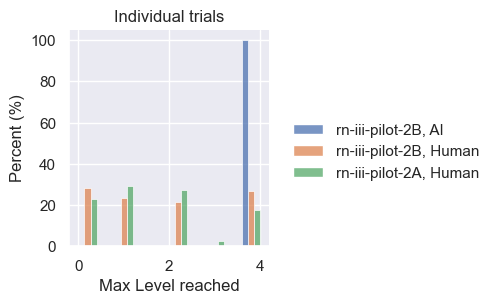

In [33]:
fig6 = sns.displot(scores_df[scores_df['trialType'] == 'individual'],
                   x="maxLevelReached",
                   hue=plot_hue,
                   kind='hist',
                   stat='percent',
                   multiple="dodge",
                   common_norm=False,
                   height=3)
# add label to the axis and label to the plot
fig6.set(xlabel="Max Level reached", ylabel="Percent (%)", title="Individual trials")

if to_save_plots:
    fig6.savefig(os.path.join(figures_path, 'maxLevel_dist_experiments.pdf'), format='pdf', dpi=300)
    fig6.savefig(os.path.join(figures_path, 'maxLevel_dist_experiments.png'), format='png', dpi=300)

### max level reached over trial index

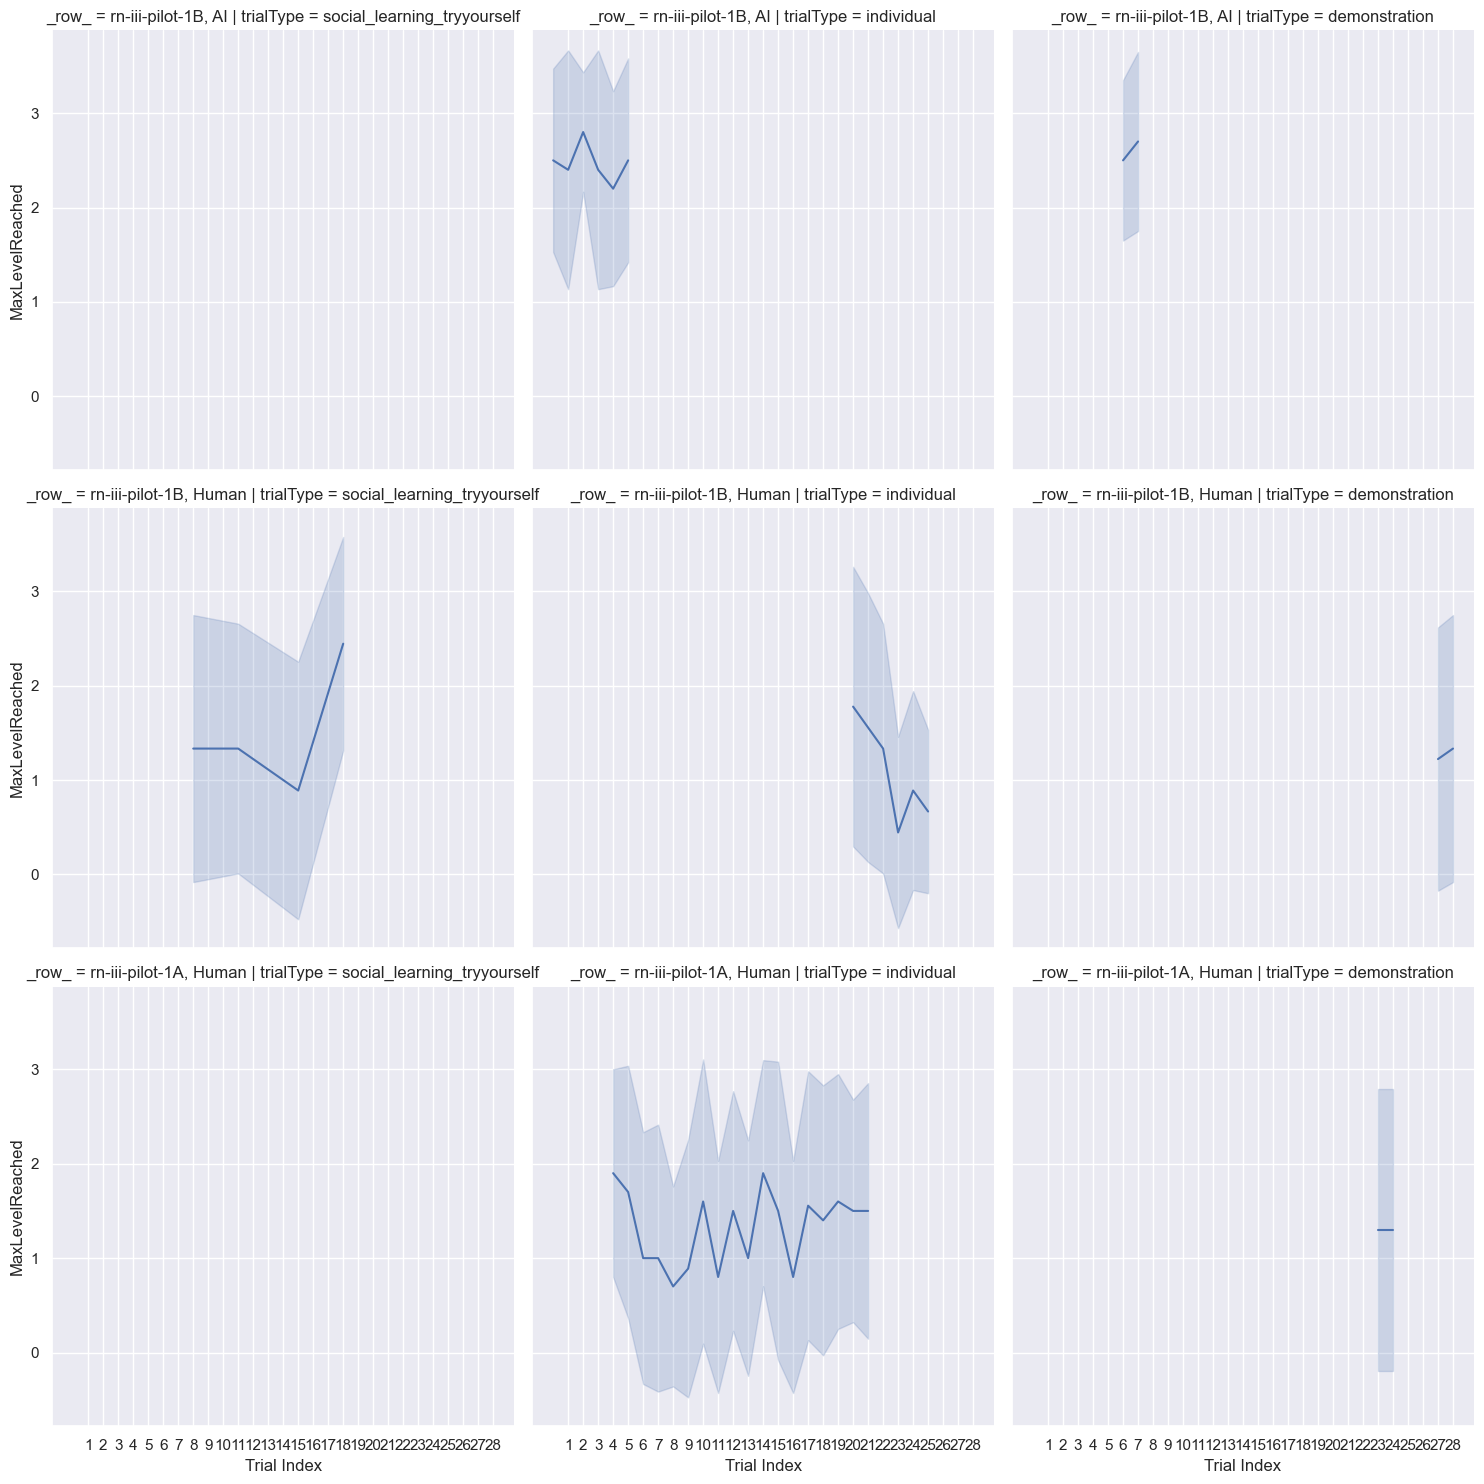

In [33]:
# individual performance over trial idx (max level)
prova = sns.relplot(data=scores_df, x="trialIdx", y="maxLevelReached",
                    row=plot_hue, col="trialType",
                    kind="line", errorbar='sd',
                    facet_kws=dict(sharey=True))
# add label to the axis and label to the plot
prova.set(xlabel="Trial Index", ylabel="MaxLevelReached")
# iterate over axes of FacetGrid
for ax in prova.axes.flat:
    ax.set_xticks([i+1 for i in range(28)])
    ax.set_xticklabels([i+1 for i in range(28)])

if to_save_plots:
    prova.savefig(os.path.join(figures_path, 'maxlevel_over_trial_idx_units1.pdf'), format='pdf', dpi=300)
    prova.savefig(os.path.join(figures_path, 'maxlevel_over_trial_idx_units1.png'), format='png', dpi=300)

## missing info plots

In [9]:
pilotA_count = pd.read_csv(os.path.join(f"./data/final/{pilot_name}A","moves_count.csv"))
# get relative trial index
pilotA_count["relative_trialIdx"]=0
for s in list(pilotA_count.sessionId.unique()):
    pilotA_count.loc[(pilotA_count["sessionId"]==s) &
                     (pilotA_count["trialType"]=="individual"),"relative_trialIdx"] = \
                     pilotA_count[(pilotA_count["sessionId"]==s)
                                  & (pilotA_count["trialType"]=="individual")]["trialIdx"]-4

    pilotA_count.loc[(pilotA_count["sessionId"]==s) &
                     (pilotA_count["trialType"]=="demonstration"),"relative_trialIdx"] = \
                     pilotA_count[(pilotA_count["sessionId"]==s)
                                  & (pilotA_count["trialType"]=="demonstration")]["trialIdx"]-23

pilotA_count.head(30)

Unnamed: 0.1                 sessionId  trialID  step  Unnamed: 0   isAI  \
0              0  636e575d5fa132cb00661dae        4     1           0  False   
1              1  636e575d5fa132cb00661dae        5     5           0  False   
2              2  636e575d5fa132cb00661dae        6     3           0  False   
3              3  636e575d5fa132cb00661dae        7     3           0  False   
4              4  636e575d5fa132cb00661dae        8     5           0  False   
5              5  636e575d5fa132cb00661dae        9     7           0  False   
6              6  636e575d5fa132cb00661dae       10     6           0  False   
7              7  636e575d5fa132cb00661dae       11     8           0  False   
8              8  636e575d5fa132cb00661dae       12     8           0  False   
9              9  636e575d5fa132cb00661dae       13     8           0  False   
10            10  636e575d5fa132cb00661dae       14     7           0  False   
11            11  636e575d5fa132cb00661dae       15     8           0  False   
12            12  636e575d5fa132cb00661dae       16     7           0  False   
13            13  636e575d5fa132cb00661dae       17     8           0  False   
14            14  636e575d5fa132cb00661dae       18     7           0  False   
15            15  636e575d5fa132cb00661dae       19     8           0  False   
16            16  636e575d5fa132cb00661dae       20     7           0  False   
17            17  636e575d5fa132cb00661dae       21     8           0  False   
18            18  636e575d5fa132cb00661dae       23     8           0  False   
19            19  636e575d5fa132cb00661dae       24     8           0  False   
20            20  636e575d5fa132cb00661daf        4     3           1  False   
21            21  636e575d5fa132cb00661daf        5     7           1  False   
22            22  636e575d5fa132cb00661daf        6     7           1  False   
23            23  636e575d5fa132cb00661daf        7     8           1  False   
24            24  636e575d5fa132cb00661daf        8     8           1  False   
25            25  636e575d5fa132cb00661daf        9     8           1  False   
26            26  636e575d5fa132cb00661daf       10     8           1  False   
27            27  636e575d5fa132cb00661daf       11     8           1  False   
28            28  636e575d5fa132cb00661daf       12     8           1  False   
29            29  636e575d5fa132cb00661daf       13     8           1  False   

        condition   ExperimentName  generation      trialType  trialIdx  \
0   human_lineage  rn-iii-pilot-1A           0     individual         4   
1   human_lineage  rn-iii-pilot-1A           0     individual         5   
2   human_lineage  rn-iii-pilot-1A           0     individual         6   
3   human_lineage  rn-iii-pilot-1A           0     individual         7   
4   human_lineage  rn-iii-pilot-1A           0     individual         8   
5   human_lineage  rn-iii-pilot-1A           0     individual         9   
6   human_lineage  rn-iii-pilot-1A           0     individual        10   
7   human_lineage  rn-iii-pilot-1A           0     individual        11   
8   human_lineage  rn-iii-pilot-1A           0     individual        12   
9   human_lineage  rn-iii-pilot-1A           0     individual        13   
10  human_lineage  rn-iii-pilot-1A           0     individual        14   
11  human_lineage  rn-iii-pilot-1A           0     individual        15   
12  human_lineage  rn-iii-pilot-1A           0     individual        16   
13  human_lineage  rn-iii-pilot-1A           0     individual        17   
14  human_lineage  rn-iii-pilot-1A           0     individual        18   
15  human_lineage  rn-iii-pilot-1A           0     individual        19   
16  human_lineage  rn-iii-pilot-1A           0     individual        20   
17  human_lineage  rn-iii-pilot-1A           0     individual        21   
18  human_lineage  rn-iii-pilot-1A           0  demonstration        23   
19  human_lineage  rn-i

In [28]:
pilotA_count_final = pilotA_count.groupby(by=["trialType","relative_trialIdx"])["step"].value_counts(normalize=True).to_frame("counts").reset_index().sort_values(by=["trialType","relative_trialIdx","step"],ascending=[True,True,False])
pilotA_count_final["percent"]=pilotA_count_final["counts"]*100

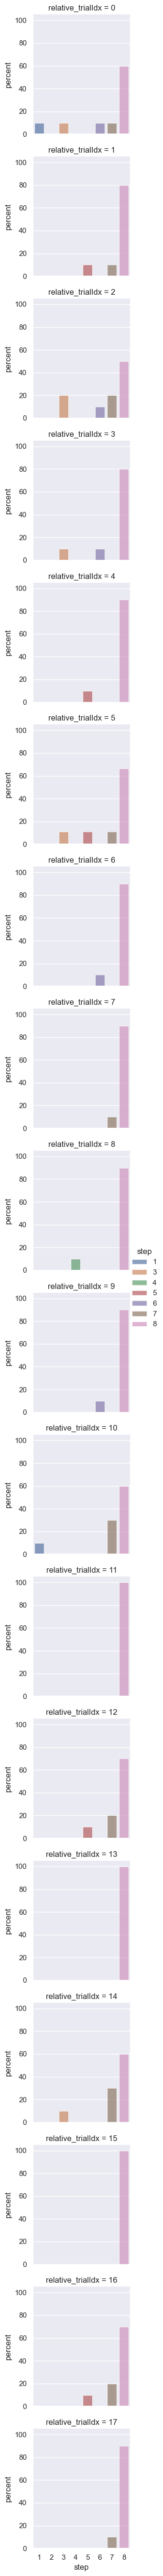

In [30]:
g = sns.FacetGrid(pilotA_count_final[pilotA_count_final["trialType"]=="individual"], row="relative_trialIdx", hue="step")
g.map(sns.barplot, "step","percent",order=[1,2,3,4,5,6,7,8], alpha=.7)
g.add_legend()
g.savefig(os.path.join(figures_path, 'missings_pilot1A.pdf'), format='pdf', dpi=300)

In [31]:
pilotB_count = pd.read_csv(os.path.join(f"./data/final/{pilot_name}B","moves_count.csv"))

# keep only human participants data
pilotB_count = pilotB_count[pilotB_count["isAI"]==False]
# get relative trial index
pilotB_count["relative_trialIdx"]=0
di = {8: 0, 11: 1, 15: 2, 18: 3}
for s in list(pilotB_count.sessionId.unique()):
    pilotB_count.loc[(pilotB_count["sessionId"]==s) &
                     (pilotB_count["trialType"]=="individual"),"relative_trialIdx"] = \
                     pilotB_count[(pilotB_count["sessionId"]==s) &
                                  (pilotB_count["trialType"]=="individual")]["trialIdx"]-20

    pilotB_count.loc[(pilotB_count["sessionId"]==s) &
                     (pilotB_count["trialType"]=="demonstration"),"relative_trialIdx"] = \
                     pilotB_count[(pilotB_count["sessionId"]==s) &
                                  (pilotB_count["trialType"]=="demonstration")]["trialIdx"]-27

    pilotB_count.loc[(pilotB_count["sessionId"]==s) &
                     (pilotB_count["trialType"]=="social_learning_tryyourself"),"relative_trialIdx"] = \
                    pilotB_count[(pilotB_count["sessionId"]==s) &
                                 (pilotB_count["trialType"]=="social_learning_tryyourself")]["trialIdx"]


pilotB_count.loc[pilotB_count["trialType"]=="social_learning_tryyourself","relative_trialIdx"] = pilotB_count[pilotB_count["trialType"]=="social_learning_tryyourself"]["relative_trialIdx"].map(di)
pilotB_count.head(30)

Unnamed: 0.1                 sessionId  trialID  step  Unnamed: 0   isAI  \
80             80  636e6aa45fa132cb00661dc7        8     8          10  False   
81             81  636e6aa45fa132cb00661dc7       11     8          10  False   
82             82  636e6aa45fa132cb00661dc7       15     8          10  False   
83             83  636e6aa45fa132cb00661dc7       18     8          10  False   
84             84  636e6aa45fa132cb00661dc7       20     7          10  False   
85             85  636e6aa45fa132cb00661dc7       21     8          10  False   
86             86  636e6aa45fa132cb00661dc7       22     8          10  False   
87             87  636e6aa45fa132cb00661dc7       23     8          10  False   
88             88  636e6aa45fa132cb00661dc7       24     8          10  False   
89             89  636e6aa45fa132cb00661dc7       25     8          10  False   
90             90  636e6aa45fa132cb00661dc7       27     8          10  False   
91             91  636e6aa45fa132cb00661dc7       28     8          10  False   
92             92  636e6aa45fa132cb00661dc8        8     5          11  False   
93             93  636e6aa45fa132cb00661dc8       11     8          11  False   
94             94  636e6aa45fa132cb00661dc8       15     8          11  False   
95             95  636e6aa45fa132cb00661dc8       18     8          11  False   
96             96  636e6aa45fa132cb00661dc8       20     8          11  False   
97             97  636e6aa45fa132cb00661dc8       21     8          11  False   
98             98  636e6aa45fa132cb00661dc8       22     8          11  False   
99             99  636e6aa45fa132cb00661dc8       23     8          11  False   
100           100  636e6aa45fa132cb00661dc8       24     7          11  False   
101           101  636e6aa45fa132cb00661dc8       25     8          11  False   
102           102  636e6aa45fa132cb00661dc8       27     8          11  False   
103           103  636e6aa45fa132cb00661dc8       28     8          11  False   
104           104  636e6aa45fa132cb00661dc9        8     6          12  False   
105           105  636e6aa45fa132cb00661dc9       11     5          12  False   
106           106  636e6aa45fa132cb00661dc9       15     5          12  False   
107           107  636e6aa45fa132cb00661dc9       18     8          12  False   
108           108  636e6aa45fa132cb00661dc9       20     8          12  False   
109           109  636e6aa45fa132cb00661dc9       21     8          12  False   

      condition   ExperimentName  generation                    trialType  \
80   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
81   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
82   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
83   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
84   AI_lineage  rn-iii-pilot-1B           1                   individual   
85   AI_lineage  rn-iii-pilot-1B           1                   individual   
86   AI_lineage  rn-iii-pilot-1B           1                   individual   
87   AI_lineage  rn-iii-pilot-1B           1                   individual   
88   AI_lineage  rn-iii-pilot-1B           1                   individual   
89   AI_lineage  rn-iii-pilot-1B           1                   individual   
90   AI_lineage  rn-iii-pilot-1B           1                demonstration   
91   AI_lineage  rn-iii-pilot-1B           1                demonstration   
92   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
93   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
94   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
95   AI_lineage  rn-iii-pilot-1B           1  social_learning_tryyourself   
96   AI_lineage  rn-iii-pilot-1B           1                   individual   
97   AI_lineage  rn-iii-pilot-1B           1                   individual   
98   AI_lineage  rn-iii-pilot-

In [32]:
pilotB_count_final = pilotB_count.groupby(by=["trialType","relative_trialIdx"])["step"].value_counts(normalize=True).to_frame("counts").reset_index().sort_values(by=["trialType","relative_trialIdx","step"],ascending=[True,True,False])
pilotB_count_final["percent"]=pilotB_count_final["counts"]*100

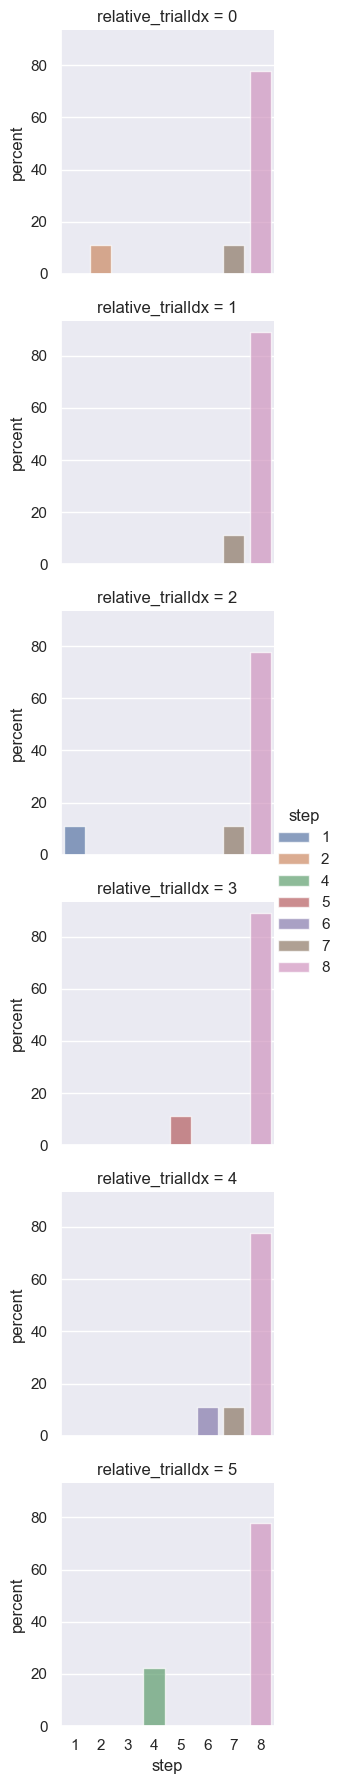

In [33]:
g = sns.FacetGrid(pilotB_count_final[pilotB_count_final["trialType"]=="individual"], row="relative_trialIdx", hue="step")
g.map(sns.barplot, "step","percent",order=[1,2,3,4,5,6,7,8], alpha=.7)
g.add_legend()
g.savefig(os.path.join(figures_path, 'missings_pilot1B.pdf'), format='pdf', dpi=300)

## (Pilot 2B) Score comparison -  Do participants that expressed the loss strategy have significantly higher scores than other participants?

In [56]:
from scipy import stats
good_sessionId_2A = ['63e60e5c86a07638e1044c27','63e60e5c86a07638e1044c28']
good_sessionId_2B = ['63e623d186a07638e1044c4b','63e623d186a07638e1044c4d','63e623d186a07638e1044c4f','63e623d186a07638e1044c51']

print('----2B compare "good" session scores with all other sessions scores----')
print("good sessions include: ", good_sessionId_2B)
# for all trials
scores_good_sessionId_2B = scores_dfB[ (scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['individual','demonstration']) ]['score']
other_scores_2B = scores_dfB[ ~(scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['individual','demonstration']) ]['score']
print('2B ALL trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='greater'))
print('2B ALL trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='less'))

# for the individual trials
scores_good_sessionId_2B = scores_dfB[ (scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['individual']) ]['score']
other_scores_2B = scores_dfB[ ~(scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['individual']) ]['score']
print('2B INDIVIDUAL trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='greater'))
print('2B INDIVIDUAL trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='less'))

# for the demonstration trials
scores_good_sessionId_2B = scores_dfB[ (scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['demonstration']) ]['score']
other_scores_2B = scores_dfB[ ~(scores_dfB['sessionId'].isin(good_sessionId_2B)) & scores_dfB['trialType'].isin(['demonstration']) ]['score']
print('2B DEMONSTRATION trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='greater'))
print('2B DEMONSTRATION trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2B,other_scores_2B,alternative='less'))

print('\n')
print('----2A compare "good" session scores with all other sessions scores----')
print("good sessions include: ", good_sessionId_2A)
# check out also possible good sessions in Pilot 2A
scores_good_sessionId_2A = scores_dfA[ (scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['individual','demonstration']) ]['score']
other_scores_2A = scores_dfA[ ~(scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['individual','demonstration']) ]['score']
print('2A ALL trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='greater'))
print('2A ALL trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='less'))

# for the individual trials
scores_good_sessionId_2A = scores_dfA[ (scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['individual']) ]['score']
other_scores_2A = scores_dfA[ ~(scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['individual']) ]['score']
print('2A INDIVIDUAL trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='greater'))
print('2A INDIVIDUAL trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='less'))

# for the demonstration trials
scores_good_sessionId_2A = scores_dfA[ (scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['demonstration']) ]['score']
other_scores_2A = scores_dfA[ ~(scores_dfA['sessionId'].isin(good_sessionId_2A)) & scores_dfA['trialType'].isin(['demonstration']) ]['score']
print('2A DEMONSTRATION trials (alternative greater)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='greater'))
print('2A DEMONSTRATION trials (alternative less)-> ',stats.ttest_ind(scores_good_sessionId_2A,other_scores_2A,alternative='less'))

----2B compare "good" session scores with all other sessions scores----
good sessions include:  ['63e623d186a07638e1044c4b', '63e623d186a07638e1044c4d', '63e623d186a07638e1044c4f', '63e623d186a07638e1044c51']
2B ALL trials (alternative greater)->  Ttest_indResult(statistic=-2.814963038581311, pvalue=0.9972502374909576)
2B ALL trials (alternative less)->  Ttest_indResult(statistic=-2.814963038581311, pvalue=0.0027497625090423636)
2B INDIVIDUAL trials (alternative greater)->  Ttest_indResult(statistic=-1.5205726942166373, pvalue=0.9344788914422251)
2B INDIVIDUAL trials (alternative less)->  Ttest_indResult(statistic=-1.5205726942166373, pvalue=0.06552110855777495)
2B DEMONSTRATION trials (alternative greater)->  Ttest_indResult(statistic=-2.8267225707988857, pvalue=0.9962702795276269)
2B DEMONSTRATION trials (alternative less)->  Ttest_indResult(statistic=-2.8267225707988857, pvalue=0.0037297204723731395)


----2A compare "good" session scores with all other sessions scores----
good sess

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_1363/2847865280.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfB['good_session'] = scores_dfB['sessionId'].isin(good_sessionId_2B)


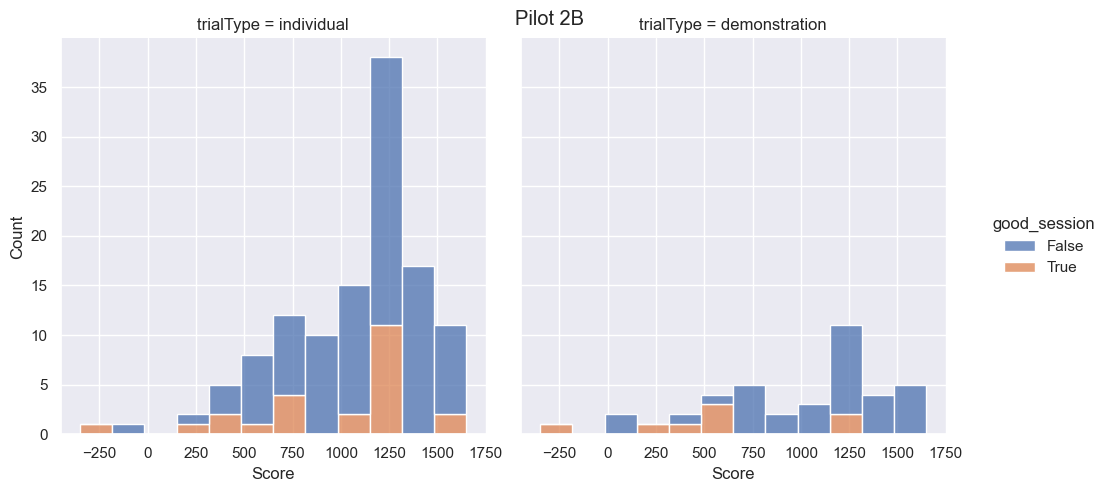

In [51]:
# 2B
scores_dfB['good_session'] = scores_dfB['sessionId'].isin(good_sessionId_2B)
fig = sns.displot(data=scores_dfB[scores_dfB['trialType'].isin(['individual','demonstration'])],
             x="score",
             hue="good_session",
             col='trialType',
             multiple="stack")
fig.set(xlabel="Score", ylabel="Count")
fig.fig.suptitle("Pilot 2B")
fig.savefig(os.path.join(figures_path,'score_comparison_2B.pdf'),format='pdf',dpi=300)

/var/folders/bf/1wzkxhv923145cbh3xbz51kh0000gr/T/ipykernel_1363/919543948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scores_dfA['good_session'] = scores_dfA['sessionId'].isin(good_sessionId_2A)


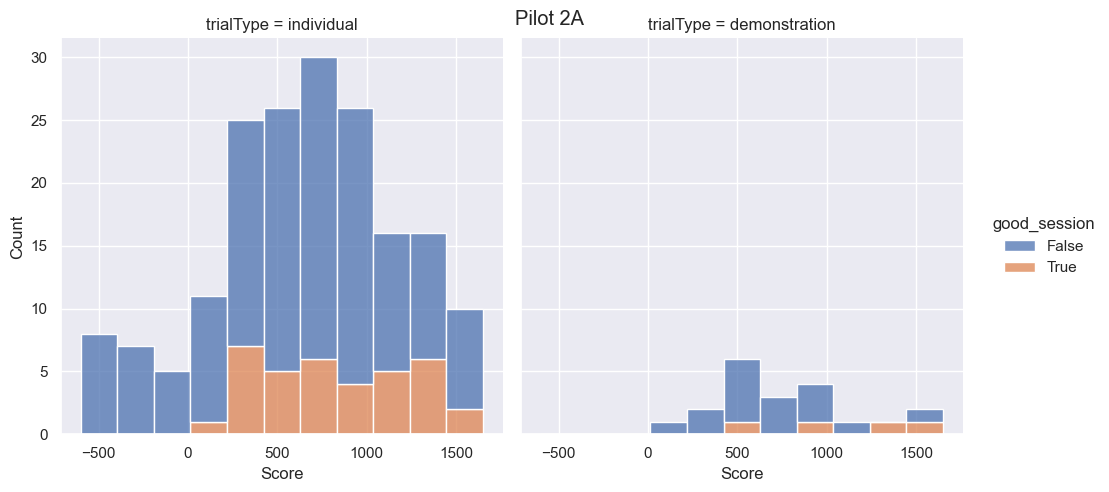

In [52]:
scores_dfA['good_session'] = scores_dfA['sessionId'].isin(good_sessionId_2A)
fig = sns.displot(data=scores_dfA[scores_dfA['trialType'].isin(['individual','demonstration'])],
             x="score",
             hue="good_session",
             col='trialType',
             multiple="stack")
fig.set(xlabel="Score", ylabel="Count")
fig.fig.suptitle("Pilot 2A")
fig.savefig(os.path.join(figures_path,'score_comparison_2A.pdf'),format='pdf',dpi=300)